# Stage 1: DATA PREPARATION (Cleaning, Merging, & Filtering Datasets)

In [1]:
import pandas as pd

# Efficiently loading dataset without printing each chunk
chunk_size = 1000
fixture_chunks = []
injuries_chunks = []

# Loading fixture dataset
for chunk in pd.read_csv(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\fixture_stats_players_clean.csv", chunksize=chunk_size):
    fixture_chunks.append(chunk)
fixture_df = pd.concat(fixture_chunks, ignore_index=True)
print("Fixture dataset loaded:", fixture_df.shape)

# Loading injury dataset
for chunk in pd.read_csv(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\fixture_injuries_clean.csv", chunksize=chunk_size):
    injuries_chunks.append(chunk)
injuries_df = pd.concat(injuries_chunks, ignore_index=True)
print(" Injury dataset loaded:", injuries_df.shape)


Fixture dataset loaded: (1113417, 40)
 Injury dataset loaded: (80071, 15)


In [2]:
#Previewing first 10 rows for fixture dataset
fixture_df.head(10)

,fixture_id,team_id,team_name,team_logo,update,player_id,player_name,position,game_minutes,game_number,...,dribbles_past,fouls_drawn,fouls_committed,yellow_cards,red_cards,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved
0,855753,1,Belgium,https://media.api-sports.io/football/teams/1.png,2024-10-07 07:43:52 UTC,20,Axel Witsel,M,90.0,6.0,...,0,1,1,0,0,0,0,0,0,0
1,135803,1,Belgium,https://media.api-sports.io/football/teams/1.png,2021-07-13 00:22:35 UTC,2296,Eden Hazard,F,68.0,10.0,...,2,4,0,0,0,1,0,1,0,0
2,855753,1,Belgium,https://media.api-sports.io/football/teams/1.png,2024-10-07 07:43:52 UTC,1422,Jeremy Doku,F,NaN,25.0,...,0,0,0,0,0,0,0,0,0,0
3,718242,1,Belgium,https://media.api-sports.io/football/teams/1.png,2021-07-03 06:30:10 UTC,1422,Jeremy Doku,F,90.0,25.0,...,0,4,2,0,0,1,0,0,0,0
4,132793,1,Belgium,https://media.api-sports.io/football/teams/1.png,2020-05-13 08:58:34 UTC,2925,Dennis Praet,M,1.0,19.0,...,0,0,0,0,0,0,0,0,0,0
5,1189853,1,Belgium,https://media.api-sports.io/football/teams/1.png,2024-10-07 07:51:06 UTC,24882,Orel Mangala,M,28.0,18.0,...,2,1,1,0,0,0,0,0,0,0
6,657690,1,Belgium,https://media.api-sports.io/football/teams/1.png,2021-06-18 04:01:25 UTC,332,Dries Mertens,F,45.0,14.0,...,1,0,2,0,0,0,0,0,0,0
7,135789,1,Belgium,https://media.api-sports.io/football/teams/1.png,2021-07-13 00:22:10 UTC,332,Dries Mertens,F,83.0,14.0,...,0,2,0,0,0,0,0,0,0,0
8,855766,1,Belgium,https://media.api-sports.io/football/teams/1.png,2024-10-07 07:44:04 UTC,2918,Koen Casteels,G,NaN,13.0,...,0,0,0,0,0,0,0,0,0,0
9,135773,1,Belgium,https://media.api-sports.io/football/teams/1.png,2021-07-13 00:21:34 UTC,2918,Koen Casteels,G,NaN,13.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Previewing first 10 rows for injuries dataset
injuries_df.head(10)

,fixture_id,fixture_date,player_id,player_name,player_photo,player_type,player_reason,league_id,league_name,league_season,league_country,league_logo,team_id,team_name,team_logo
0,1126162,2023-10-03 19:00:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Suspended,2,UEFA Champions League,2023,World,https://media.api-sports.io/football/leagues/2...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
1,946833,2022-11-03 17:45:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Illness,3,UEFA Europa League,2022,World,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
2,1035090,2023-09-23 19:00:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Suspended,39,Premier League,2023,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
3,1035101,2023-09-30 14:00:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Suspended,39,Premier League,2023,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
4,1035352,2023-12-23 12:30:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Coach's decision,39,Premier League,2023,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
5,868147,2023-01-22 16:30:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Lacking Match Fitness,39,Premier League,2022,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
6,1035140,2023-11-04 12:30:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Suspended,39,Premier League,2023,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
7,868098,2022-11-13 16:30:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Questionable,Illness,39,Premier League,2022,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
8,1035296,2023-11-26 16:30:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Missing Fixture,Suspended,39,Premier League,2023,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png
9,868086,2022-11-06 14:00:00 UTC,18,J. Sancho,https://media.api-sports.io/football/players/1...,Questionable,Illness,39,Premier League,2022,England,https://media.api-sports.io/football/leagues/3...,33,Manchester United,https://media.api-sports.io/football/teams/33.png


In [4]:
# Checking for missing values
print("Fixture Dataset Missing Values:\n", fixture_df.isnull().sum())
print("\nInjury Dataset Missing Values::\n", injuries_df.isnull().sum())

Fixture Dataset Missing Values:
 fixture_id                    0
team_id                       0
team_name                     0
team_logo                     0
update                        0
player_id                     0
player_name                   0
position                      0
game_minutes             173858
game_number                   1
rating                        0
captain                       0
substitute                    0
shots_total                   0
shots_on                      0
goals_total                   0
goals_conceded                0
assists                       0
saves                         0
total_passes                  0
completed_passes              0
pass_percentage               0
key_passes                    0
total_tackles                 0
blocks_tackles                0
interceptions_tackles         0
duels_total                   0
duels_won                     0
dribbles_attempts             0
dribbles_success              0
dribble

In [5]:
# Previewing and comparing column names in the original fixture and injury datasets


print("Fixture Dataset Columns:\n", fixture_df.columns.tolist())
print("\nInjury Dataset Columns:\n", injuries_df.columns.tolist())

Fixture Dataset Columns:
 ['fixture_id', 'team_id', 'team_name', 'team_logo', 'update', 'player_id', 'player_name', 'position', 'game_minutes', 'game_number', 'rating', 'captain', 'substitute', 'shots_total', 'shots_on', 'goals_total', 'goals_conceded', 'assists', 'saves', 'total_passes', 'completed_passes', 'pass_percentage', 'key_passes', 'total_tackles', 'blocks_tackles', 'interceptions_tackles', 'duels_total', 'duels_won', 'dribbles_attempts', 'dribbles_success', 'dribbles_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'red_cards', 'penalty_won', 'penalty_committed', 'penalty_scored', 'penalty_missed', 'penalty_saved']

Injury Dataset Columns:
 ['fixture_id', 'fixture_date', 'player_id', 'player_name', 'player_photo', 'player_type', 'player_reason', 'league_id', 'league_name', 'league_season', 'league_country', 'league_logo', 'team_id', 'team_name', 'team_logo']


In [6]:
# Merging datasets on fixture_id and player_id, since they are common unique identifiers
merged_df = pd.merge(fixture_df, injuries_df, how='left', on=['fixture_id', 'player_id'])
print("Merged Dataset Shape:", merged_df.shape)

Merged Dataset Shape: (1113417, 53)


In [7]:
# Filling missing values in injury-related columns

injury_cols =['player_reason']
merged_df[injury_cols] = merged_df[injury_cols].fillna("No Injury Recorded")

In [8]:
# Displaying all column names in the merged dataset

print(merged_df.columns.tolist())

['fixture_id', 'team_id_x', 'team_name_x', 'team_logo_x', 'update', 'player_id', 'player_name_x', 'position', 'game_minutes', 'game_number', 'rating', 'captain', 'substitute', 'shots_total', 'shots_on', 'goals_total', 'goals_conceded', 'assists', 'saves', 'total_passes', 'completed_passes', 'pass_percentage', 'key_passes', 'total_tackles', 'blocks_tackles', 'interceptions_tackles', 'duels_total', 'duels_won', 'dribbles_attempts', 'dribbles_success', 'dribbles_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'red_cards', 'penalty_won', 'penalty_committed', 'penalty_scored', 'penalty_missed', 'penalty_saved', 'fixture_date', 'player_name_y', 'player_photo', 'player_type', 'player_reason', 'league_id', 'league_name', 'league_season', 'league_country', 'league_logo', 'team_id_y', 'team_name_y', 'team_logo_y']


In [9]:
# Renaming columns for cleaner reference
merged_df.rename(columns={
    'player_name_x': 'player_name',
    'team_name_x': 'team_name',
    'player_name_y': 'player_name_injury',
    'team_name_y': 'team_name_injury',
    'player_reason': 'injury_reason',
    'fixture_date': 'injury_date'
}, inplace=True)

In [10]:
# Previewing key player and injury info (first 10 records)

merged_df[['player_name', 'team_name', 'injury_date', 'injury_reason']].head(10)

,player_name,team_name,injury_date,injury_reason
0,Axel Witsel,Belgium,NaN,No Injury Recorded
1,Eden Hazard,Belgium,NaN,No Injury Recorded
2,Jeremy Doku,Belgium,NaN,No Injury Recorded
3,Jeremy Doku,Belgium,NaN,No Injury Recorded
4,Dennis Praet,Belgium,NaN,No Injury Recorded
5,Orel Mangala,Belgium,NaN,No Injury Recorded
6,Dries Mertens,Belgium,NaN,No Injury Recorded
7,Dries Mertens,Belgium,NaN,No Injury Recorded
8,Koen Casteels,Belgium,NaN,No Injury Recorded
9,Koen Casteels,Belgium,NaN,No Injury Recorded


In [11]:
# Dropping redundant or duplicate columns after merging

merged_df.drop(
    columns=['player_name_injury', 'team_name_injury', 'team_id_y', 'team_logo_y'],
    errors='ignore',
    inplace=True)

In [12]:
# Previewing again after dropping extra columns to confirm structure

merged_df[['player_name', 'team_name', 'injury_date', 'injury_reason']].head(10)

,player_name,team_name,injury_date,injury_reason
0,Axel Witsel,Belgium,NaN,No Injury Recorded
1,Eden Hazard,Belgium,NaN,No Injury Recorded
2,Jeremy Doku,Belgium,NaN,No Injury Recorded
3,Jeremy Doku,Belgium,NaN,No Injury Recorded
4,Dennis Praet,Belgium,NaN,No Injury Recorded
5,Orel Mangala,Belgium,NaN,No Injury Recorded
6,Dries Mertens,Belgium,NaN,No Injury Recorded
7,Dries Mertens,Belgium,NaN,No Injury Recorded
8,Koen Casteels,Belgium,NaN,No Injury Recorded
9,Koen Casteels,Belgium,NaN,No Injury Recorded


In [13]:
# Checking the top 20 most common team names in the dataset

merged_df['team_name'].value_counts().head(20)

team_name
AS Roma                8058
Real Madrid            7990
Sevilla                7960
Barcelona              7896
Napoli                 7791
Inter                  7740
Manchester City        7729
Manchester United      7672
Lazio                  7668
Atletico Madrid        7594
Juventus               7590
AC Milan               7578
Liverpool              7569
Villarreal             7502
Atalanta               7414
Arsenal                7382
Real Sociedad          7361
Paris Saint Germain    7297
Chelsea                7187
Tottenham              7090
Name: count, dtype: int64

In [14]:
# Listing all unique team names in the dataset (club + national) to support filtering

merged_df['team_name'].unique()

array(['Belgium', 'France', 'Croatia', 'Russia', 'Sweden', 'Brazil',
       'Uruguay', 'Colombia', 'Spain', 'England', 'Panama', 'Japan',
       'Senegal', 'Serbia', 'Switzerland', 'Mexico', 'South Korea',
       'Iceland', 'Nigeria', 'Australia', 'Denmark', 'Iran',
       'Saudi Arabia', 'Poland', 'Germany', 'Argentina', 'Portugal',
       'Tunisia', 'Costa Rica', 'Peru', 'Morocco', 'Egypt',
       'Manchester United', 'Newcastle', 'Bournemouth', 'Fulham',
       'Huddersfield', 'Watford', 'Wolves', 'Liverpool', 'Southampton',
       'Arsenal', 'Cardiff', 'Burnley', 'Everton', 'Leicester',
       'Tottenham', 'West Ham', 'Chelsea', 'Manchester City', 'Brighton',
       'Crystal Palace', 'Reading', 'Birmingham', 'Brentford',
       'Bristol City', 'Ipswich', 'Millwall', 'Preston', 'West Brom',
       'Wigan', 'Sheffield Utd', 'Leeds', 'Hull City',
       'Nottingham Forest', 'Aston Villa', 'Blackburn', 'Bolton', 'Derby',
       'Middlesbrough', 'Norwich', 'QPR', 'Rotherham',
       'Sh

In [15]:
#Loading a predefined national team list to exclude

national_teams = [
    'Belgium', 'France', 'Croatia', 'Russia', 'Sweden', 'Brazil', 'Uruguay', 'Colombia', 'Spain', 'England',
    'Panama', 'Japan', 'Senegal', 'Serbia', 'Switzerland', 'Mexico', 'South Korea', 'Iceland', 'Nigeria',
    'Australia', 'Denmark', 'Iran', 'Saudi Arabia', 'Poland', 'Germany', 'Argentina', 'Portugal', 'Tunisia',
    'Costa Rica', 'Peru', 'Morocco', 'Egypt', 'Wales', 'Italy', 'Hungary', 'Czech Republic', 'Northern Ireland',
    'Ukraine', 'Slovakia', 'Romania', 'Austria', 'Rep. Of Ireland', 'Turkey', 'Türkiye', 'Albania', 'Norway',
    'Slovenia', 'Latvia', 'Gibraltar', 'Armenia', 'Kazakhstan', 'Azerbaijan', 'Lithuania', 'Faroe Islands',
    'Finland', 'Belarus', 'Estonia', 'Luxembourg', 'Bulgaria', 'Georgia', 'FYR Macedonia', 'Cyprus',
    'Liechtenstein', 'Scotland', 'Montenegro', 'andorra', 'Kosovo', 'Malta', 'Bosnia & Herzegovina',
    'Moldova', 'San Marino', 'Israel', 'Greece', 'Netherlands', 'Tanzania', 'Madagascar', 'Mauritania',
    'Gambia', 'Namibia', 'Malawi', 'Sierra Leone', 'Mali', 'Burkina Faso', 'Gabon', 'Ghana', 'Ethiopia',
    'Zambia', 'Congo DR', 'Guinea', 'Sudan', 'Kenya', 'Mozambique', 'Guinea-Bissau', 'Benin', 'Uganda',
    'Equatorial Guinea', 'Zimbabwe', 'Comoros', 'Burundi', 'Angola', 'Cameroon', 'South Africa', 'Algeria',
    'Cape Verde Islands', 'Qatar', 'Venezuela', 'Paraguay', 'Bolivia', 'Ecuador', 'Chile', 'USA', 'Jamaica',
    'Haiti', 'Cuba', 'Honduras', 'El Salvador', 'Guatemala', 'Trinidad and Tobago', 'Canada', 'Grenada',
    'St. Kitts and Nevis', 'Martinique', 'Pirae', 'Suriname', 'Guadeloupe'
]

#Filtering dataset to keep club teams only

club_teams = merged_df[~merged_df['team_name'].isin(national_teams)].copy()

In [16]:
# Previewing the cleaned club-level dataset

club_teams[['player_name', 'team_name', 'injury_date', 'injury_reason']].head(10)

,player_name,team_name,injury_date,injury_reason
1024,Fred,Manchester United,NaN,No Injury Recorded
1025,Fred,Manchester United,NaN,No Injury Recorded
1026,Fred,Manchester United,NaN,No Injury Recorded
1027,Fred,Manchester United,NaN,No Injury Recorded
1028,Fred,Manchester United,NaN,No Injury Recorded
1029,Fred,Manchester United,NaN,No Injury Recorded
1030,Fred,Manchester United,NaN,No Injury Recorded
1031,Fred,Manchester United,NaN,No Injury Recorded
1032,Fred,Manchester United,NaN,No Injury Recorded
1033,Fred,Manchester United,NaN,No Injury Recorded


In [17]:
# Confirming how many rows and cloumns are in the filtered club-level dataset

print("Final club-only dataset shape:", club_teams.shape)

Final club-only dataset shape: (1083261, 49)


In [18]:
# Checking for any team names that still look like nationa teams

possible_nationals = club_teams['team_name'].value_counts().head(50)
print(possible_nationals)

team_name
AS Roma                8058
Real Madrid            7990
Sevilla                7960
Barcelona              7896
Napoli                 7791
Inter                  7740
Manchester City        7729
Manchester United      7672
Lazio                  7668
Atletico Madrid        7594
Juventus               7590
AC Milan               7578
Liverpool              7569
Villarreal             7502
Atalanta               7414
Arsenal                7382
Real Sociedad          7361
Paris Saint Germain    7297
Chelsea                7187
Tottenham              7090
Preston                6990
Real Betis             6989
Bristol City           6970
QPR                    6940
Borussia Dortmund      6906
Athletic Club          6894
Cardiff                6892
Bayer Leverkusen       6834
Middlesbrough          6830
Fiorentina             6818
Norwich                6805
Swansea                6804
Valencia               6801
Leeds                  6763
Monaco                 6707
Stoke City

In [19]:
# Defined path and filename for the new CSV

club_teams_path =  r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\club_teams_filtered_dataset.csv"

# Saving the Datframe to CSV
club_teams.to_csv(club_teams_path, index=False)

print(f"Club-Level dataset saved successfully as: {club_teams_path}")

Club-Level dataset saved successfully as: C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\club_teams_filtered_dataset.csv


# Additional Cleaning and Transformation

In [20]:
import numpy as np

# Log-transform "key_passes" to reduce skewness ---
club_teams['key_passes_log'] = np.log1p(club_teams['key_passes'])

# Renaming pass_percentage to 'pass_accuracy' for consistency
club_teams.rename(columns={'pass_percentage': 'pass_accuracy'}, inplace=True)

# Remove invalid rows with rating <= 0 or pass_accuracy < 10 ---
club_teams_cleaned = club_teams[(club_teams['rating'] > 0) & (club_teams['pass_accuracy'] >= 10)].copy()

# Export cleaned dataset for modelling ---
cleaned_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data\club_teams_final_cleaned.csv"
club_teams_cleaned.to_csv(cleaned_path, index=False)

print(f"Cleaned club dataset saved to: {cleaned_path}")


Cleaned club dataset saved to: C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data\club_teams_final_cleaned.csv


# Stage 2: Feature Analysis - All KPIs Inclusive (Impact on Position Pre vs Post-Injury Analysis, Performance, Visual Charts etc.) 

In [21]:
# KPI 1: INJURY ANALYSIS

In [22]:
# Converting 'injury_date' to datatime format

club_teams['injury_date'] = pd.to_datetime(club_teams['injury_date'], errors='coerce', dayfirst=True)

C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\3209399299.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S %Z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  club_teams['injury_date'] = pd.to_datetime(club_teams['injury_date'], errors='coerce', dayfirst=True)


In [23]:
# Flagging rows where an injury has ocuured

club_teams['injured'] = club_teams['injury_reason'].apply(lambda x: 0 if pd.isna(x) or x== "No Injury Recorded" else 1)

In [24]:
# Total number of recorded injuries per player

injury_counts = club_teams.groupby ('player_name')['injured'].sum().reset_index()
injury_counts.columns = ['player_name', 'total_injuries']

# Merging injury count back to main dataset

club_teams = club_teams.merge(injury_counts, on='player_name', how='left')

In [25]:
# Previewing added columns

club_teams[['player_name', 'team_name', 'injury_date', 'injury_reason', 'injured', 'total_injuries']].head(10)

,player_name,team_name,injury_date,injury_reason,injured,total_injuries
0,Fred,Manchester United,NaT,No Injury Recorded,0,0
1,Fred,Manchester United,NaT,No Injury Recorded,0,0
2,Fred,Manchester United,NaT,No Injury Recorded,0,0
3,Fred,Manchester United,NaT,No Injury Recorded,0,0
4,Fred,Manchester United,NaT,No Injury Recorded,0,0
5,Fred,Manchester United,NaT,No Injury Recorded,0,0
6,Fred,Manchester United,NaT,No Injury Recorded,0,0
7,Fred,Manchester United,NaT,No Injury Recorded,0,0
8,Fred,Manchester United,NaT,No Injury Recorded,0,0
9,Fred,Manchester United,NaT,No Injury Recorded,0,0


In [26]:
# Step 1: Adding an estimated injury duration columns (assuming 21 days per injury)

club_teams['injury_duration_days'] = club_teams['injured'].apply(lambda x: 21 if x == 1 else 0)

In [27]:
# Step 2: Estimate number of games missed (1 match every ~3days)

club_teams['games_missed'] = (club_teams['injury_duration_days'] / 3).round().astype('Int64')

In [28]:
# Preview injury impact features

club_teams[['player_name', 'team_name', 'injury_reason', 'injured', 'injury_duration_days', 'games_missed']].head(10)

,player_name,team_name,injury_reason,injured,injury_duration_days,games_missed
0,Fred,Manchester United,No Injury Recorded,0,0,0
1,Fred,Manchester United,No Injury Recorded,0,0,0
2,Fred,Manchester United,No Injury Recorded,0,0,0
3,Fred,Manchester United,No Injury Recorded,0,0,0
4,Fred,Manchester United,No Injury Recorded,0,0,0
5,Fred,Manchester United,No Injury Recorded,0,0,0
6,Fred,Manchester United,No Injury Recorded,0,0,0
7,Fred,Manchester United,No Injury Recorded,0,0,0
8,Fred,Manchester United,No Injury Recorded,0,0,0
9,Fred,Manchester United,No Injury Recorded,0,0,0


In [29]:
# Defined path and filename for the new injury imapct features CSV

injury_impact_path =  r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\club_teams_injury_impact_features_dataset.csv"

# Saving the Datframe to CSV
club_teams.to_csv(injury_impact_path, index=False)

print(f"club teams injury impact features dataset saved successfully as:\n {injury_impact_path}")

club teams injury impact features dataset saved successfully as:
 C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\club_teams_injury_impact_features_dataset.csv


In [30]:
# Step 3: Exploring Injury Impact Across Players & Teams

In [31]:
# Counting total injured vs non-injured

club_teams['injured'].value_counts()

injured
0    1082769
1        492
Name: count, dtype: int64

In [32]:
# Top 10 Injured Players

club_teams[club_teams['injured'] == 1]['player_name'].value_counts().head(10)

player_name
Masaya Okugawa      2
Joe Mattock         2
Alejandro Bedoya    2
Álvaro Odriozola    2
Eduard Löwen        2
Ben Sheaf           2
Giovanni Reyna      2
Mason Mount         2
Alfredo Morales     2
João Moutinho       2
Name: count, dtype: int64

In [33]:
# Top 10 Teams with most injuries recorded

club_teams[club_teams['injured'] == 1]['team_name'].value_counts().head(10)

team_name
Chicago Fire          10
New York City FC      10
Borussia Dortmund     10
Portland Timbers       9
Philadelphia Union     8
Liverpool              8
1899 Hoffenheim        8
Columbus Crew          7
Manchester City        7
FC Augsburg            7
Name: count, dtype: int64

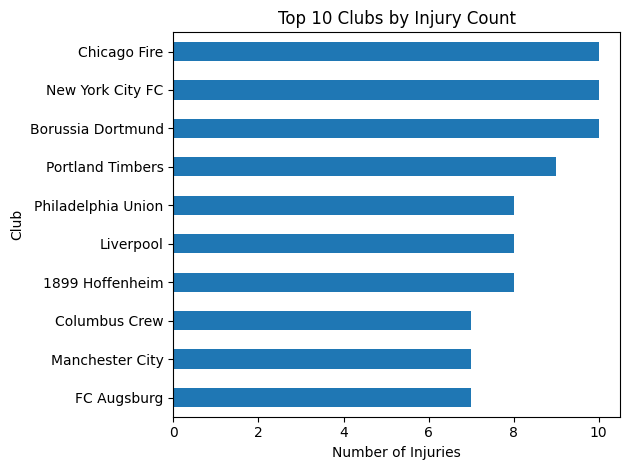

In [34]:
import matplotlib.pyplot as plt

injury_counts = club_teams [club_teams['injured'] == 1]['team_name'].value_counts().head(10)
injury_counts.plot(kind='barh', title='Top 10 Clubs by Injury Count')
plt.xlabel("Number of Injuries")
plt.ylabel("Club")
plt.gca().invert_yaxis()

# Save the plot
plt.tight_layout()  # optional, helps prevent label cutoff
plt.savefig(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\top_10_injury_clubs.png")

# Show the plot
plt.show()

# Stage 3: Performance Pre- and Post-Injury Analysis 

In [35]:
# Converting to datetime and creating estimated return date (assuming 21-day injury as stated above)

club_teams['injury_date'] = pd.to_datetime(club_teams['injury_date'], errors='coerce')
club_teams['update'] = pd.to_datetime(club_teams['update'], errors='coerce')

# Adding estimated return date

club_teams['injury_return_date_estimated'] = club_teams['injury_date'] + pd.to_timedelta(club_teams['injury_duration_days'], unit='D')

In [36]:
# Filtering injured players only and selecting records for Fred

injured_players = club_teams[club_teams['injured'] == 1]
fred_data = injured_players[club_teams['player_name'] == 'Fred']

C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\2911217463.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fred_data = injured_players[club_teams['player_name'] == 'Fred']


In [37]:
# Checking if Fred has an inury record

if fred_data.empty:
    print("Fred does not have any injury record.")
else:
    print("Fred's injury record found. Proceeding...")


Fred does not have any injury record.


In [38]:
# Finding players with injury
injured_players = club_teams[club_teams['injured'] == 1]['player_name'].unique()

# Previewing the first 20 names
print("Injured Players:", injured_players[:20])


Injured Players: ['Martin Ødegaard' 'Lee Tomlin' 'Dan Burn' 'Christian Walton'
 'Greg Cunningham' 'Hicham Boudaoui' 'Daniel Peretz' 'Roman Bürki'
 'Florian Niederlechner' 'Marcel Halstenberg' 'Levent Mercan'
 'Maxime Delanghe' 'Mees de Wit' 'André Castro' 'Sandro Tonali'
 'Adrien Rabiot' 'Stephan El Shaarawy' 'Alexis Saelemaekers'
 'Bartłomiej Drągowski' 'Pedri']


In [39]:
# Does the player named 'Martin Ødegaard' have any injury on a said date(s)?

club_teams[(club_teams['player_name'] == 'Martin Ødegaard') & (club_teams['injured'] == 1)]

,fixture_id,team_id_x,team_name,team_logo_x,update,player_id,player_name,position,game_minutes,game_number,...,league_name,league_season,league_country,league_logo,key_passes_log,injured,total_injuries,injury_duration_days,games_missed,injury_return_date_estimated
4998,592816,42,Arsenal,https://media.api-sports.io/football/teams/42.png,2021-05-17 16:33:22+00:00,37127,Martin Ødegaard,M,16.0,11.0,...,Premier League,2020.0,England,https://media.api-sports.io/football/leagues/3...,0.0,1,1,21,7,2021-05-14 19:00:00+00:00


In [40]:
# Showing a 10 real injured players with injury dates
club_teams[club_teams['injured'] == 1][['player_name', 'team_name', 'injury_date', 'injury_reason']
].dropna().drop_duplicates(subset='player_name').head(10)


,player_name,team_name,injury_date,injury_reason
4998,Martin Ødegaard,Arsenal,2021-04-23 19:00:00+00:00,Ankle Injury
5240,Lee Tomlin,Cardiff,2021-05-08 11:30:00+00:00,Injury
9434,Dan Burn,Brighton,2021-04-12 19:15:00+00:00,Thigh Injury
12540,Christian Walton,Ipswich,2023-10-03 18:45:00+00:00,Ankle Injury
13449,Greg Cunningham,Preston,2021-04-17 11:30:00+00:00,Injury
24466,Hicham Boudaoui,Nice,2024-09-25 19:00:00+00:00,Knee Injury
30077,Daniel Peretz,Bayern München,2024-09-21 13:30:00+00:00,Hip Injury
33051,Roman Bürki,Borussia Dortmund,2021-04-24 13:30:00+00:00,Illness
35320,Florian Niederlechner,FC Augsburg,2021-04-11 13:30:00+00:00,Groin Injury
36222,Marcel Halstenberg,RB Leipzig,2021-05-22 13:30:00+00:00,Knock


In [41]:
# Step 3 (A): Extracting Martin Ødegaard’s injury and estimated return date
player_name = 'Martin Ødegaard'

martin_data = club_teams[(club_teams['player_name'] == player_name) & (club_teams['injured'] == 1)]

# Extracting injury and return date
martin_injury_date = martin_data['injury_date'].iloc[0]
martin_return_date = martin_data['injury_return_date_estimated'].iloc[0]

print(f"Martin Ødegaard injury date: {martin_injury_date}") 
print(f"Estimated return date: {martin_return_date}") 

Martin Ødegaard injury date: 2021-04-23 19:00:00+00:00
Estimated return date: 2021-05-14 19:00:00+00:00


In [42]:
# Step 3 (B): Extracting all Martin Ødegaard records

martin_all = club_teams[club_teams['player_name'] == player_name]

# Step 3 (C): Extracting all Martin Ødegaard records
 
# Splitiing into pre- and post -injury record
martin_before = martin_all[martin_all['update'] < martin_injury_date]
martin_after = martin_all[martin_all['update'] > martin_return_date]

print(f"Records Before Injury: {martin_before.shape[0]}")
print(f"Records After Return: {martin_after.shape[0]}")

Records Before Injury: 31
Records After Return: 171


In [43]:
# Step 3 (D): Performance Comparison - Before vs After Injury

# List of performance metrics to compare
performance_metrics = ['game_minutes', 'goals_total', 'assists', 'shots_total', 'total_passes', 'completed_passes',
                       'key_passes']

# Calculating mean performance before and after injury
before_stats = martin_before[performance_metrics].mean().rename('Before Injury')
after_stats = martin_after[performance_metrics].mean().rename('After Injury')

# Combining into one DataFrame for easier comparison
comparison_df = pd.concat([before_stats, after_stats], axis=1)

# Displaying Comparison

print(f"Performance Comparison for {player_name}")
display(comparison_df)

                                                        


Performance Comparison for Martin Ødegaard


,Before Injury,After Injury
game_minutes,81.677419,76.382716
goals_total,0.129032,0.204678
assists,0.193548,0.146199
shots_total,1.612903,1.005848
total_passes,40.838710,41.327485
completed_passes,34.580645,35.789474
key_passes,2.096774,2.000000


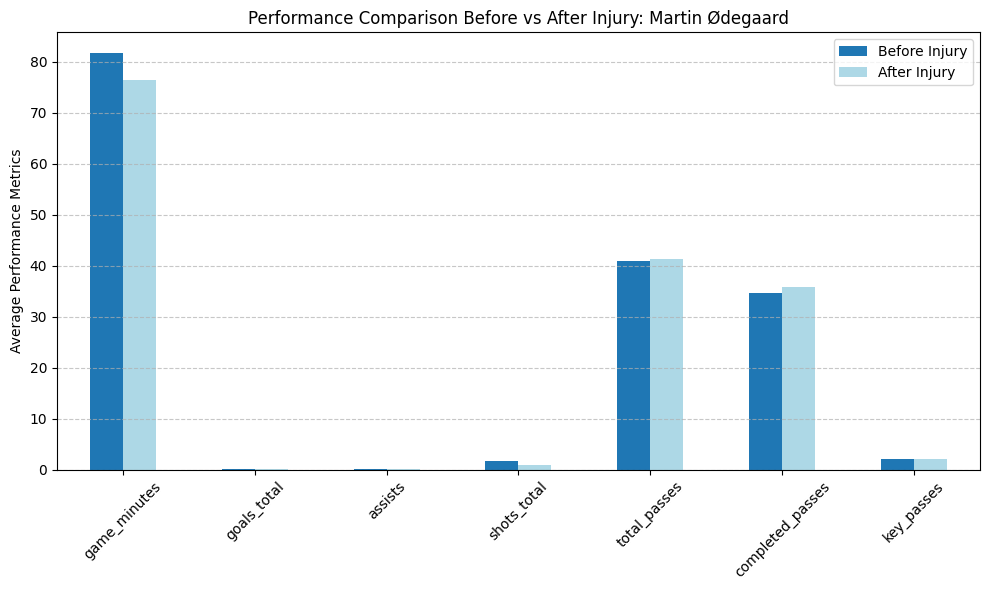

In [44]:
# Step 3 (E): Visualizing Comparison for  Martin Ødegaard (Bar Plot)

# Visualizing Befire vs After Injury for  Martin Ødegaard

import matplotlib.pyplot as plt

# Plotting bar chart for comparison
comparison_df.plot(kind='bar', figsize=(10, 6), color=['#1f77b4','lightblue'])

plt.title(f"Performance Comparison Before vs After Injury: {player_name}")
plt.ylabel("Average Performance Metrics")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
 
# File saved before showing
plt.savefig(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\Martin_Ødegaard_performance_comparison.png")
   
plt.show()


In [45]:
# Write finidngs here....................

In [46]:
# Running below codes to check if injured players have valid injury_date and injury_return_date_estimated:

In [47]:
# Filter to only injured players with proper dates

valid_injuries = club_teams[
    (club_teams['injured'] == 1) &
    (club_teams['injury_date'].notna()) &
    (club_teams['injury_return_date_estimated'].notna())
]

# Preview a few 
print(f"Total rows with valid injury and return date: {valid_injuries.shape[0]}")
display(valid_injuries[['player_name', 'team_name', 'injury_date', 'injury_return_date_estimated']].drop_duplicates(subset='player_name').head(20))

Total rows with valid injury and return date: 492


,player_name,team_name,injury_date,injury_return_date_estimated
4998,Martin Ødegaard,Arsenal,2021-04-23 19:00:00+00:00,2021-05-14 19:00:00+00:00
5240,Lee Tomlin,Cardiff,2021-05-08 11:30:00+00:00,2021-05-29 11:30:00+00:00
9434,Dan Burn,Brighton,2021-04-12 19:15:00+00:00,2021-05-03 19:15:00+00:00
12540,Christian Walton,Ipswich,2023-10-03 18:45:00+00:00,2023-10-24 18:45:00+00:00
13449,Greg Cunningham,Preston,2021-04-17 11:30:00+00:00,2021-05-08 11:30:00+00:00
24466,Hicham Boudaoui,Nice,2024-09-25 19:00:00+00:00,2024-10-16 19:00:00+00:00
30077,Daniel Peretz,Bayern München,2024-09-21 13:30:00+00:00,2024-10-12 13:30:00+00:00
33051,Roman Bürki,Borussia Dortmund,2021-04-24 13:30:00+00:00,2021-05-15 13:30:00+00:00
35320,Florian Niederlechner,FC Augsburg,2021-04-11 13:30:00+00:00,2021-05-02 13:30:00+00:00
36222,Marcel Halstenberg,RB Leipzig,2021-05-22 13:30:00+00:00,2021-06-12 13:30:00+00:00


In [48]:
# Step 3 (F): Repeating for All Injured Players (Automate & Summarize)

summary_results = {}

performance_metrics =  ['game_minutes', 'goals_total', 'assists', 'shots_total','total_passes', 'completed_passes',
                       'key_passes']

for _, row in valid_injuries.drop_duplicates(subset='player_name').iterrows():
    player_name = row['player_name']
    injury_date = row['injury_date']
    return_date = row['injury_return_date_estimated']
    
    player_data = club_teams[club_teams['player_name'] == player_name]
    
    # Enusrig enough data exists before and after
    before = player_data[player_data['update'] < injury_date]
    after = player_data[player_data['update'] > return_date]

    if len(before) >= 3 and len(after) >=3: # Filter to ensure enough data
        before_stats = before[performance_metrics].mean().rename("Before Injury")
        after_stats = after[performance_metrics].mean().rename("After Injury")
        comp_df =pd.concat([before_stats, after_stats], axis=1)
        summary_results[player_name] = comp_df
    else:
        continue # Skips players with sufficient data


In [49]:
# Checking how many valid comparisons were created 

valid_players = [player for player, df in summary_results.items() if df is not None and not df.empty]

print(f"Total valid player comparisons: {len(valid_players)}")
print("Players with valid comparison data:")
print(valid_players[:10]) #Shows only first 10 if many

Total valid player comparisons: 404
Players with valid comparison data:
['Martin Ødegaard', 'Dan Burn', 'Christian Walton', 'Greg Cunningham', 'Hicham Boudaoui', 'Daniel Peretz', 'Roman Bürki', 'Florian Niederlechner', 'Marcel Halstenberg', 'Maxime Delanghe']


In [50]:
# Picking one player from output to check if a player has enough performance data
sample_player = "Martin Ødegaard" # using Pedri as a test-player
sample_data = club_teams[club_teams['player_name'] == sample_player]

print(f"Match count for {sample_player}: {sample_data.shape[0]}")
display(sample_data[['player_name', 'update', 'game_minutes', 'injury_date', 'injury_reason']].head(10))


Match count for Martin Ødegaard: 202


,player_name,update,game_minutes,injury_date,injury_reason
4993,Martin Ødegaard,2024-05-21 04:16:06+00:00,90.0,NaT,No Injury Recorded
4994,Martin Ødegaard,2022-05-24 04:10:58+00:00,23.0,NaT,No Injury Recorded
4995,Martin Ødegaard,2022-05-24 04:11:56+00:00,66.0,NaT,No Injury Recorded
4996,Martin Ødegaard,2023-05-30 04:12:24+00:00,90.0,NaT,No Injury Recorded
4997,Martin Ødegaard,2024-05-21 04:13:43+00:00,89.0,NaT,No Injury Recorded
4998,Martin Ødegaard,2021-05-17 16:33:22+00:00,16.0,2021-04-23 19:00:00+00:00,Ankle Injury
4999,Martin Ødegaard,2021-05-17 16:31:57+00:00,90.0,NaT,No Injury Recorded
5000,Martin Ødegaard,2024-05-21 04:12:04+00:00,90.0,NaT,No Injury Recorded
5001,Martin Ødegaard,2024-12-12 04:06:30+00:00,78.0,NaT,No Injury Recorded
5002,Martin Ødegaard,2023-05-30 04:13:18+00:00,90.0,NaT,No Injury Recorded


In [51]:
# Step 3 (G) Saving summary_results with valid comparisonsto Excel
import os

# Defining directory and path
output_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets"
output_path = os.path.join(output_dir, "all_players_injury_comparison.xlsx")

# Creating directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Firstly, collect only non-empty comparisons
non_empty_results ={
    player: df for player, df in summary_results.items()
    if df is not None and not df.empty
}

# Then save Excel file only with valid sheets
if non_empty_results:
    with pd.ExcelWriter(output_path) as writer:
        for player, comp_df in non_empty_results.items():
          # Sheet names must be <= 31 characters
          safe_name = player[:31].replace("/", "-").replace("\\", "-")  # Excel sheet name rules
          comp_df.to_excel(writer, sheet_name=safe_name)

# Confirming success or warning  
    print(f"All plyaer performance comparisons saved to:\n{output_path}")
else:
    print("No valid player comparisons to save. Excel file not created.")

All plyaer performance comparisons saved to:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\all_players_injury_comparison.xlsx


In [52]:
# Checking how many valid comparisons were created
valid_players = [player for player, df in summary_results.items() if df is not None and not df.empty]

print(f"Total valid player comparisons: {len(valid_players)}")
print("Players with valid comparison data:")
print(valid_players[:10]) # Showing first 10 if many

Total valid player comparisons: 404
Players with valid comparison data:
['Martin Ødegaard', 'Dan Burn', 'Christian Walton', 'Greg Cunningham', 'Hicham Boudaoui', 'Daniel Peretz', 'Roman Bürki', 'Florian Niederlechner', 'Marcel Halstenberg', 'Maxime Delanghe']


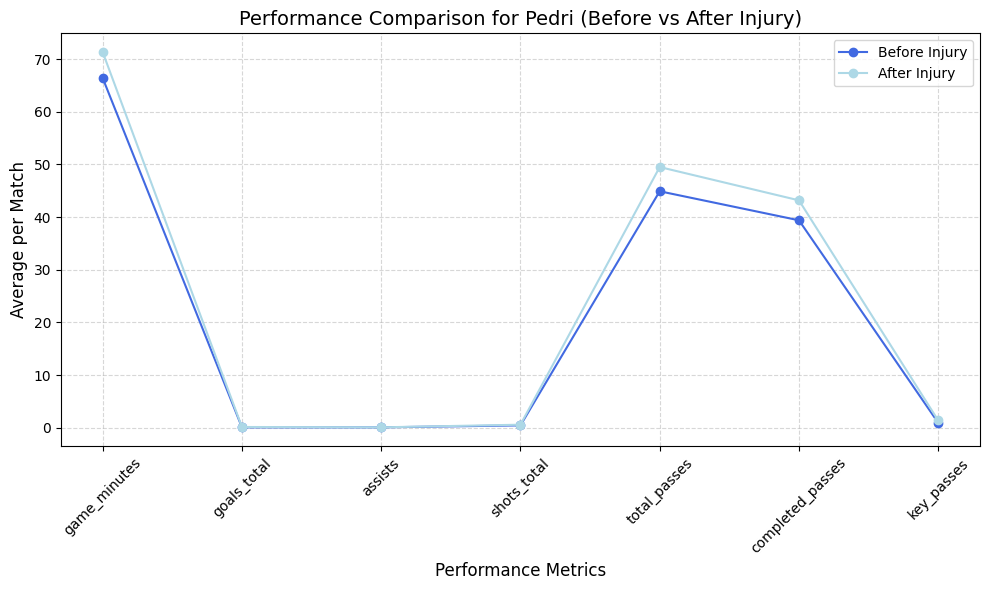

Line chart saved to:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_performance_comparison_line.png


In [53]:
# Step 3 (H): Line Chart for Pedri's Before vs After-Injury Stats

import matplotlib.pyplot as plt

# Extracting Pedri's data from summary
pedri_df = summary_results.get("Pedri")

if pedri_df is not None and not pedri_df.empty:
    # Plotting graph
    plt.figure(figsize=(10, 6))
    plt.plot(pedri_df.index, pedri_df['Before Injury'], marker='o', label='Before Injury', color='royalblue')
    plt.plot(pedri_df.index, pedri_df['After Injury'], marker='o', label='After Injury', color='lightblue')
    plt.title("Performance Comparison for Pedri (Before vs After Injury)", fontsize=14)
    plt.xlabel("Performance Metrics", fontsize=12)
    plt.ylabel("Average per Match", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()

    # Saving figure
    polished_chart_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_performance_comparison_line.png"
    plt.savefig(polished_chart_path)
    
    plt.show()

    print(f"Line chart saved to:\n{polished_chart_path}")
else:
    print("Pedri's comparison data is not available.")


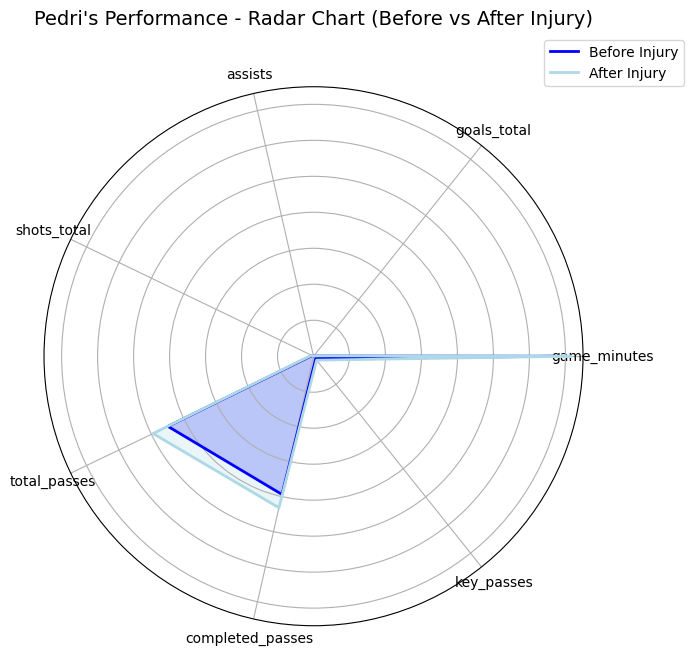

 Radar chart saved to:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_performance_radar.png


In [54]:
# Step 3 (I): Radar Chart - Visualizing Pedir's Stats Radially
import numpy as np
# Radar char setup
labels = pedri_df.index.tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # complete loop

# values

before = pedri_df['Before Injury'].tolist()
after = pedri_df['After Injury'].tolist()
before += before[:1]
after += after[:1]

# Plotting graph
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.plot(angles, before, label='Before Injury', linewidth=2, linestyle='solid', color='blue')
ax.fill(angles, before, alpha=0.25, color='blue')

ax.plot(angles, after, label='After Injury', linewidth=2, linestyle='solid', color='lightblue')
ax.fill(angles, after, alpha=0.25, color='lightblue')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_title("Pedri's Performance - Radar Chart (Before vs After Injury)", size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))


#Saving figure
radar_chart_path =r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_performance_radar.png"
plt.savefig(radar_chart_path, bbox_inches='tight')
plt.show()

print(f" Radar chart saved to:\n{radar_chart_path}")

In [55]:
# Write finidngs here.................... 

In [56]:
# Step 3 (J): Exporting Summary + Visuals Paths to Excel Report

import pandas as pd

# Collecting Pedri comparison with file links (for reference)
pedri_summary_export = pedri_df.copy()
pedri_summary_export['Chart_Type'] = ['Line', 'Radar', '', '', '', '', '']
pedri_summary_export['File_Path'] = [polished_chart_path if i == 0 else radar_chart_path if i == 1 else "" for i in range(len(pedri_df))]

# Saving to Excel 
excel_report_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_injury_analysis_export.xlsx"
pedri_summary_export.to_excel(excel_report_path, sheet_name="Pedri Performance", index=True)

print(f"Pedri's report summary exported to:\n{excel_report_path}")



Pedri's report summary exported to:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_injury_analysis_export.xlsx


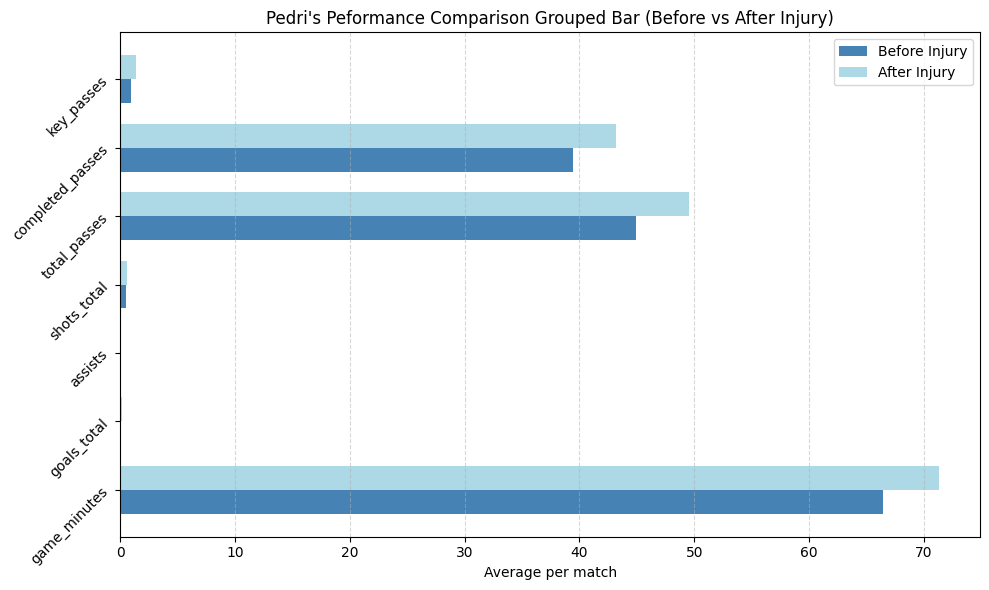

Grouped Bar Chart saved to:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_grouped_bar_chart.png


In [57]:
# Step 3 (K): Grouped Bar Chart - Pedri's Performance Before vs Aftery Injury
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare and sort data 

metrics = pedri_df.index.tolist()
before_values = pedri_df['Before Injury'].values
after_values =pedri_df['After Injury'].values

# Computing average values Before and After sorting
avg_values = (before_values + after_values) / 2

# Sort by descending average

# Format labels (replacing underscores with spaces and capitalizing)

# Step 2:  Ploting Graph
y = np.arange(len(metrics)) # label locations
width = 0.35 # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.barh(y - width/2, before_values, width, label='Before Injury', color='steelblue')
bars2 =ax.barh(y + width/2, after_values, width, label='After Injury', color='lightblue')

# Labels and titles
ax.set_xlabel('Average per match')
ax.set_title("Pedri's Peformance Comparison Grouped Bar (Before vs After Injury)")
ax.set_yticks(y)
ax.set_yticklabels(metrics, rotation=45)
ax.legend()
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

# Saving Chart
grouped_bar_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\pedri_grouped_bar_chart.png"
plt.savefig(grouped_bar_path, dpi=300)
plt.show()

print(f"Grouped Bar Chart saved to:\n{grouped_bar_path}")

# KPI 2: Logistic Regression & Decision Tree (Expanding KPIs)

In [58]:
# PERFORMANCE KPIs

In [59]:
# Step 2 (A): Feature Engineering continued - Expanding KPIs

import pandas as pd

# Creating new KPI features
club_teams['pass_accuracy'] = (club_teams['completed_passes'] / club_teams['total_passes']).round(2)
club_teams['shot_accuracy'] = (club_teams['shots_on'] / club_teams['shots_total']).round(2)
club_teams['discipline_score'] = (club_teams['yellow_cards'] * 1 + club_teams['red_cards']*3) # weighted
club_teams['goal_contribution'] = club_teams['goals_total'] + club_teams['assists']
club_teams['duel_success_rate'] = (club_teams['duels_won'] / club_teams['duels_total']).round(2)
club_teams['dribble_success_rate'] = (club_teams['dribbles_success'] / club_teams['dribbles_attempts']).round(2)

print("KPI features expanded successfully!")

KPI features expanded successfully!


In [60]:
# Step 2 (B):  (Pre-filtering Final): Keep players with enough games, but exclude zeros for threshold
club_teams_filtered = club_teams[
    club_teams['game_number'] >= 10
].copy()

# Drop goal_contribution == 0 before computing threshold
non_zero_gc = club_teams_filtered[club_teams_filtered['goal_contribution'] > 0]
performance_threshold = non_zero_gc['goal_contribution'].quantile(0.75)

# Now safely define high performer across full filtered set
club_teams_filtered.loc[:, 'high_performer'] = (
    club_teams_filtered['goal_contribution'] >= performance_threshold
).astype(int)

# Confirm outcome
print(f"Final threshold at 75th percentile (non-zero GC): {performance_threshold:.2f}")
print(club_teams_filtered['high_performer'].value_counts())


Final threshold at 75th percentile (non-zero GC): 1.00
high_performer
0    659971
1     85913
Name: count, dtype: int64


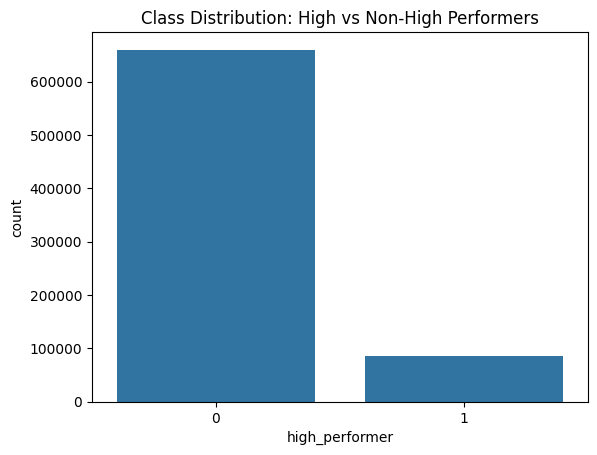

In [61]:
import seaborn as sns
sns.countplot(x='high_performer', data=club_teams_filtered)
plt.title("Class Distribution: High vs Non-High Performers")

# File saved before showing
plt.savefig(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\class_distribution_high_vs_nonhigh_performers.png")
   
plt.show()

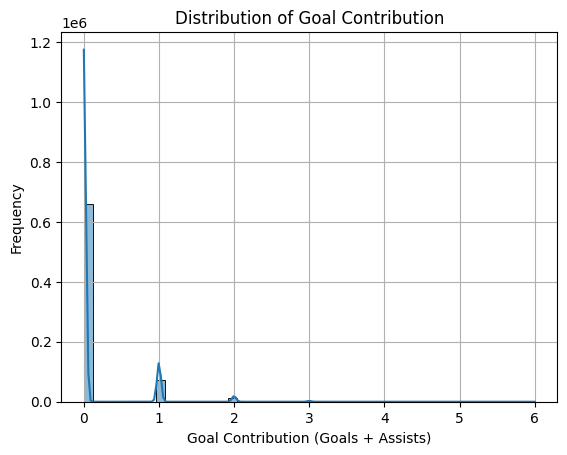

count    745884.000000
mean          0.134706
std           0.402065
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: goal_contribution, dtype: float64


<Figure size 640x480 with 0 Axes>

In [62]:
# Check how goal contribution is distributed
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(club_teams_filtered['goal_contribution'], bins=50, kde=True)
plt.title("Distribution of Goal Contribution")
plt.xlabel("Goal Contribution (Goals + Assists)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Showing descriptive stats
print(club_teams_filtered['goal_contribution'].describe())

# File saved before showing
plt.savefig(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\Analysis\distribution_of_goal_contribution.png")

 # Stage 3: FEATURE ENGINEERING - (Feature Selection, Training, & Modeling)

In [63]:
# Step 2 (C): Selecting features for modeling

selected_features = [
    'game_minutes', 'goals_total', 'assists', 'shots_total', 'completed_passes',
    'key_passes', 'total_tackles', 'interceptions_tackles', 'pass_accuracy',
    'shot_accuracy', 'discipline_score', 'goal_contribution',
    'duel_success_rate', 'dribble_success_rate'
]

# Drop missing values and prepare X and y
model_df = club_teams_filtered[selected_features + ['high_performer']].dropna()
X = model_df[selected_features]
y = model_df['high_performer']

print(f"Modeling dataset prepared: {X.shape[0]} samples and {X.shape[1]} features.")
print("Class distribution:\n", y.value_counts())


Modeling dataset prepared: 166314 samples and 14 features.
Class distribution:
 high_performer
0    117623
1     48691
Name: count, dtype: int64


In [64]:
print("Full label class distribution (y):")
print(y.value_counts())

Full label class distribution (y):
high_performer
0    117623
1     48691
Name: count, dtype: int64


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

print("Logistic Regression and Decision Tree Models Trained Successfully.")


Logistic Regression and Decision Tree Models Trained Successfully.


In [66]:
# Step 2 (E): Evaluating Models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# logistic Regression Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Decision Tree Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print("-" * 40)

# Evaluate both models
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree Classifier")


Logistic Regression Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
----------------------------------------
Decision Tree Classifier Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
----------------------------------------


# Stage 4: Random Forests (overfitting, advanced modeling & Interpretaion)

In [67]:
# Step 3 (A): Checking for Duplicates or Static Patterns in Data

# Checking for duplicate rows in the modeling dataset
duplicate_rows = model_df.duplicated().sum()
print(f"Total duplicate rows in mdoel_df: {duplicate_rows}")

# Viewing sample duplicates if any
if duplicate_rows > 0:
    display(model_df[model_df.duplicated()].head())

# Checking for players with same stats across all rows (This can indicate lable leakage)
constant_rows = X.nunique(axis=1).value_counts().get(1, 0)
print(f"Rows with constant values across all features: {constant_rows}")

Total duplicate rows in mdoel_df: 609


,game_minutes,goals_total,assists,shots_total,completed_passes,key_passes,total_tackles,interceptions_tackles,pass_accuracy,shot_accuracy,discipline_score,goal_contribution,duel_success_rate,dribble_success_rate,high_performer
41910,12.0,0,0,1,4,0,0,0,0.80,0.0,0,0,1.00,1.0,0
59842,73.0,0,0,1,34,1,0,0,0.79,0.0,0,0,0.29,1.0,0
61462,12.0,0,0,1,4,0,0,0,0.80,0.0,0,0,1.00,1.0,0
73361,10.0,0,0,1,1,0,0,0,1.00,0.0,0,0,0.00,0.0,0
96968,80.0,0,0,1,5,0,0,0,0.62,1.0,0,0,0.17,0.0,0


Rows with constant values across all features: 0


In [68]:
# Step 3 (B): Training Random Forest and Evaluating with Cross-Validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initlialising Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Corss-validation
cv =StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores =cross_val_score(rf_model, X, y, cv=cv, scoring='f1')

# Displauying cross-validation performance
print(f"Random Forest CV F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean():.4f}")

Random Forest CV F1 Scores: [1. 1. 1. 1. 1.]
Mean CV F1 Score: 1.0000


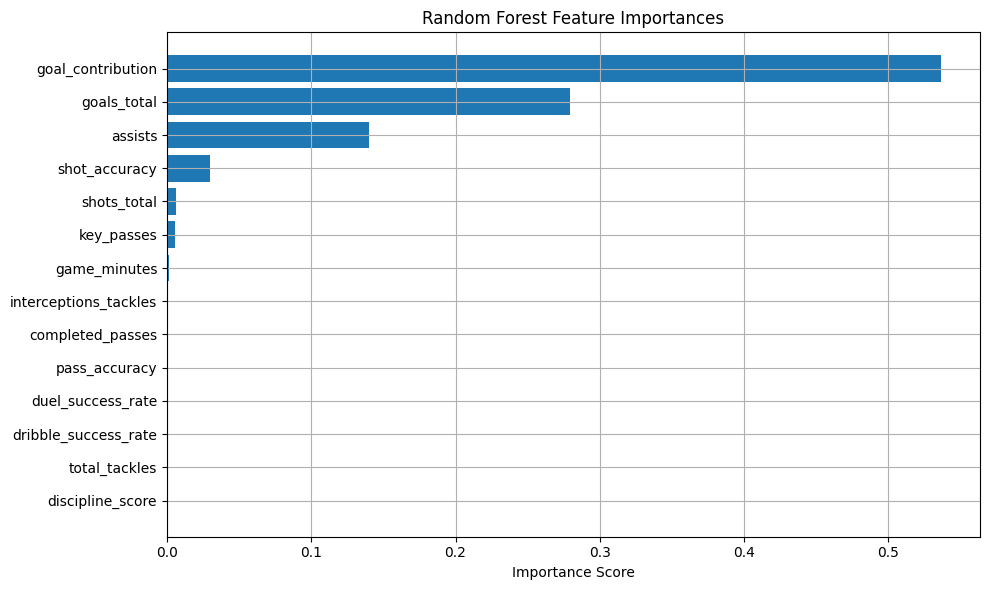

In [69]:
# Step 3 (C): Fitting Random Forest and Showing Feature Importances

# Fitiing model on full training data

rf_model.fit(X_train, y_train)

# Getting feature importances
importances = rf_model.feature_importances_
features = X.columns
importance_df =pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importnaces
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Step 3 (D): Removing Duplicate Rows to Avoid Overfitting 
print(f"Original dataset size: {model_df.shape}")

model_df = model_df.drop_duplicates()
X = model_df[selected_features]
y = model_df['high_performer']

print(f"Dataset size after removing duplicates: {model_df.shape}")

Original dataset size: (166314, 15)
Dataset size after removing duplicates: (165705, 15)


In [71]:
# Step 3 (E): Re-training and Re-evaluating Models

# Re-splitiing and re-training after duplicate removal
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Re-initialising and training models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logistic_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

print("Logistic Regression and Decision Tree Models Trained Successfully.")

Logistic Regression and Decision Tree Models Trained Successfully.


In [72]:
# Step 3 (F): Evaluating again Post-Fix

# Re-evaluating model after fixing duplicates
from sklearn.metrics import classification_report

print("Logistic Regression Performance:")
print(classification_report(y_test, logistic_model.predict(X_test)))

print("Decision Tree Performance:")
print(classification_report(y_test, tree_model.predict(X_test)))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35114
           1       1.00      1.00      1.00     14598

    accuracy                           1.00     49712
   macro avg       1.00      1.00      1.00     49712
weighted avg       1.00      1.00      1.00     49712

Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35114
           1       1.00      1.00      1.00     14598

    accuracy                           1.00     49712
   macro avg       1.00      1.00      1.00     49712
weighted avg       1.00      1.00      1.00     49712



<Figure size 640x480 with 0 Axes>

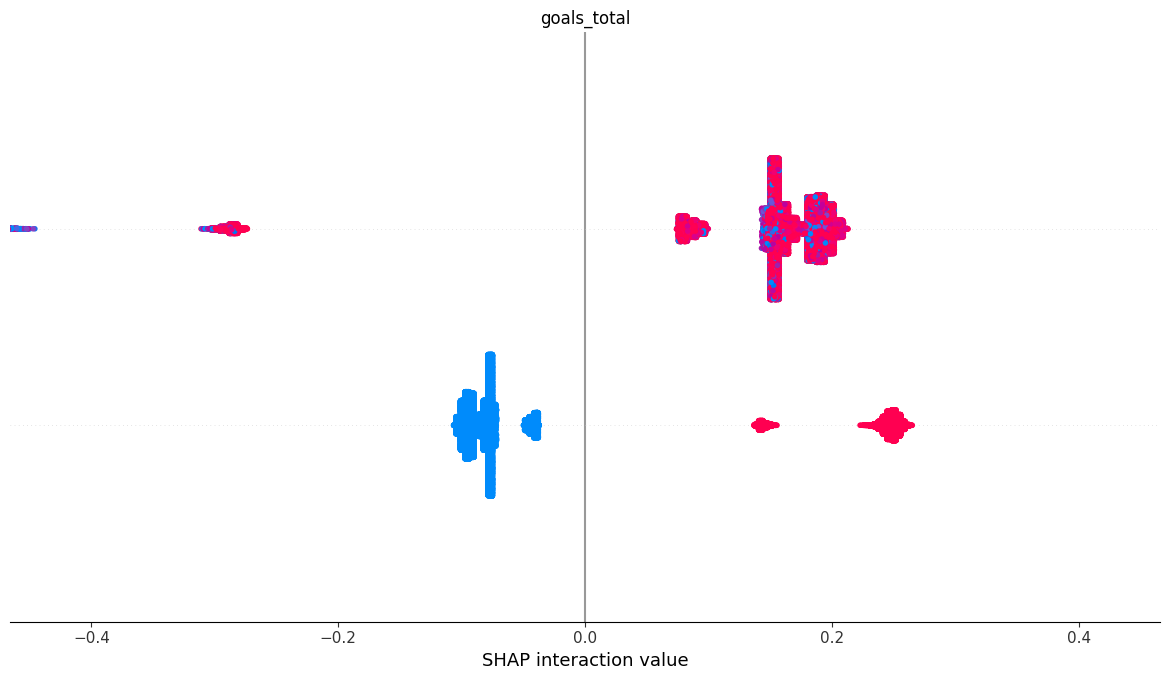

In [73]:
# Step 4 (A): SHAP Summary Plot Using TreeExplainer (Safe Faallback)

import shap
import matplotlib.pyplot as plt

# TreeExplaniner for RandomForest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Summary plot for hgh performer class (class 1)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [74]:
type(shap_values)

numpy.ndarray

100%|===================| 231876/231986 [04:51<00:00]        

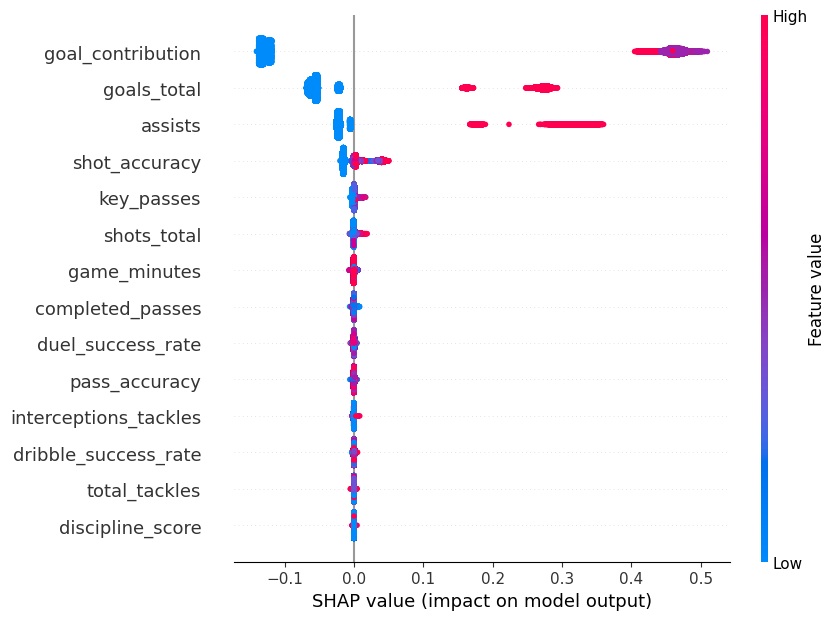

In [75]:
# Step 4 (B): Beeswarm Plot for Global Interpretability

import shap

# Recomputing SHAP Explanation Object (different from shap_values = explainer.shap_values())
explainer = shap.Explainer(rf_model, X_train) # uses model and training data
shap_values = explainer(X_train) # returns Explanation object

# SHAP Beeswarm Plot for global feature impact
shap.plots.beeswarm(shap_values[:, :, 1] , max_display=15)

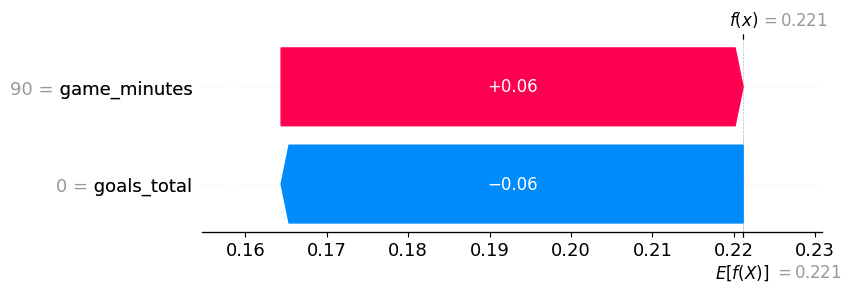

In [76]:
# Step 4 (C): SHAP Waterfall Plot for Local Interpretability

import shap

# Picking an instance index to explain
instance_index = 100

# Extracting single explanation (class 1, for instance 100)
explanation = shap.Explanation(
    values=shap_values.values[instance_index, 1],
    base_values=shap_values.base_values[instance_index, 1],
    data=X_train.iloc[instance_index],
    feature_names=X_train.columns.tolist()
)

# Waterfall Plot for Class 1 (High Performer)
shap.plots.waterfall(explanation, max_display=15)

In [77]:
# Predicting probabilities for all tarinng instances 
y_pred_proba = rf_model.predict_proba(X_train)[:, 1] # Probability of being a high performer

# Finding index of the top predicted high performer
top_index = y_pred_proba.argmax()

print(f"Top predicted high performer index: {top_index}")
print(X_train.iloc[top_index]) # Showing features for that player

Top predicted high performer index: 40
game_minutes             76.00
goals_total               1.00
assists                   1.00
shots_total               6.00
completed_passes         18.00
key_passes                1.00
total_tackles             2.00
interceptions_tackles     2.00
pass_accuracy             0.69
shot_accuracy             0.67
discipline_score          0.00
goal_contribution         2.00
duel_success_rate         0.55
dribble_success_rate      1.00
Name: 622851, dtype: float64


In [78]:
# Finding index of the top predicted high performer
top_index = y_pred_proba.argmax()

print(f"The index of the Top Predicted High Performer is: {top_index}")

# then confirm with:

# Safely choosing a valid index (like 0 or checking shap_values.shape[0])
print(f"The maximum valid index in shap_values is: {shap_values.shape[0]-1}")


The index of the Top Predicted High Performer is: 40
The maximum valid index in shap_values is: 115992


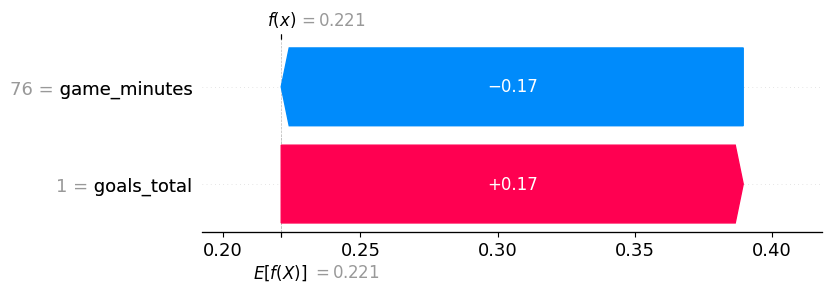

In [79]:
# Waterfall Plot for Top Predicted High Performer

from shap import Explanation

# Creating SHAP explanation object for top predicted high performer (class 1)
explanation_top = Explanation(
    values = shap_values.values[top_index, 1],
    base_values = shap_values.base_values[top_index, 1],
    data = X_train.iloc[top_index],
    feature_names = X_train.columns.tolist()
)

# Plotting the Waterfall
shap.plots.waterfall(explanation_top, max_display=15)

In [80]:
# Finding index of the lowest predicted high performer (i.e confidently not high)
low_index = y_pred_proba.argmin()

print(f"Lowest predicted high performer index: {low_index}")
print(X_train.iloc[low_index]) # Showing features for that player

Lowest predicted high performer index: 11
game_minutes             90.00
goals_total               0.00
assists                   0.00
shots_total               1.00
completed_passes         28.00
key_passes                0.00
total_tackles             3.00
interceptions_tackles     2.00
pass_accuracy             0.82
shot_accuracy             0.00
discipline_score          1.00
goal_contribution         0.00
duel_success_rate         0.46
dribble_success_rate      0.00
Name: 670101, dtype: float64


In [81]:
# Finding index of the top predicted high performer
low_index = y_pred_proba.argmin()

print(f"The index of the Lowest Predicted High Performer is: {low_index}")

# then confirm with:

# Safely choosing a valid index (like 0 or checking shap_values.shape[0])
print(f"The maximum valid index in shap_values (along axis 1) is: {shap_values.shape[1]-1}")


The index of the Lowest Predicted High Performer is: 11
The maximum valid index in shap_values (along axis 1) is: 13


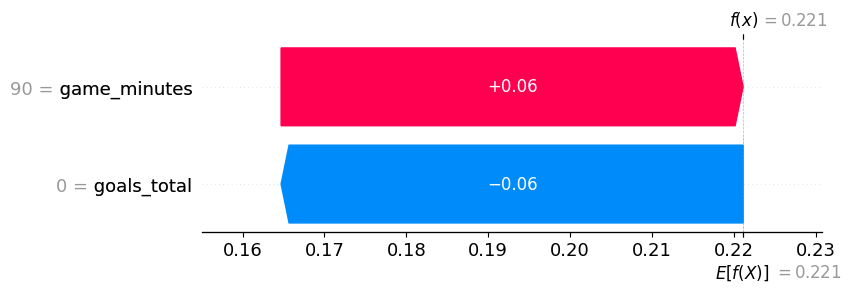

In [82]:
# Waterfall Plot for the Lowest Predicted High Performer


# Creating SHAP explanation object for top predicted high performer (class 1)
explanation_low = Explanation(
    values=shap_values.values[low_index, 1],
    base_values = shap_values.base_values[low_index, 1],
    data = X_train.iloc[low_index],
    feature_names = X_train.columns.tolist()
)

# Plotting the Waterfall
shap.plots.waterfall(explanation_low, max_display=15)

In [83]:
# Step 5: Saving Outputs for Reuse and Reporting

# Step 5 (A): Creating Output Folders:
import os

# Definig output paths
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
paths = {
    "data": os.path.join(base_path, "data"),
    "models": os.path.join(base_path, "models"),
    "plots": os.path.join(base_path, "plots"),
    "shap_objects": os.path.join(base_path,"shap_objects"),
}

# Creating folders 
for path in paths.values():
    os.makedirs(path, exist_ok=True)


In [84]:
# Step 5 (B): Saving Cleaned Data and TranSfomred Inputs

import pandas as pd 

# Saving cleaned training features and target
X_train.to_csv(os.path.join(paths["data"], "X_train_cleaned.csv"), index=False)
y_train.to_csv(os.path.join(paths["data"], "y_train_cleaned.csv"), index=False)

# Saving the original X 
X.to_csv(os.path.join(paths["data"], "X_full_features.csv"), index=False)


In [85]:
# Step 5 (C): Saving Trained Random Forest Model

import joblib

# Saving trained Random Forest Model
joblib.dump(rf_model, os.path.join(paths["models"], "random_forest_model.pkl"))

['C:\\Users\\agyek\\OneDrive\\Data_Analytics_and_IT_Security_Management\\Data Analytics\\Research Project\\Datasets\\msc_outputs\\models\\random_forest_model.pkl']

In [86]:
# Step 5 (D): Saving SHAP objects and Visulas
import shap
import matplotlib.pyplot as plt

# Saving SHAP values object
joblib.dump(shap_values, os.path.join(paths["shap_objects"], "shap_values_class1.pkl"))

# Saving SHAP Summary plot as image
plt.figure()
shap.summary_plot(shap_values.values[:, :, 1], X_train, show=False) # For class 1
plt.savefig(os.path.join(paths["plots"], "shap_summary_class1.png"), bbox_inches='tight')
plt.close()

print(f"Image Saved Successfully")

Image Saved Successfully


In [87]:
# Saving the SHAP Explainer and SHAP Values
import pickle  
import joblib

# Save SHAP explainer
with open(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\shap_objects\explainer.pkl", "wb") as f:
    pickle.dump(explainer, f)

# Save SHAP values
with open(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\shap_objects\shap_values.pkl", "wb") as f:
    pickle.dump(shap_values, f)

# Save the trained RandomForest model
joblib.dump(rf_model, r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\models\rf_model.joblib")


['C:\\Users\\agyek\\OneDrive\\Data_Analytics_and_IT_Security_Management\\Data Analytics\\Research Project\\Datasets\\msc_outputs\\models\\rf_model.joblib']

In [88]:
# Step 6: Automated Loading Code 

# Step 6 (A): Automated Loading of Saved Data, Models, and SHAP Objects

import pandas as pd
import joblib
import pickle
import os

# Defining base and subfolder paths
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")
model_path = os.path.join(base_path, "models")
plots_path = os.path.join(base_path, "plots")
shap_path = os.path.join(base_path, "shap_objects")


# Saving cleaned and split data for future loading
club_teams.to_csv(os.path.join(data_path, "club_teams_final.csv"), index=False)
X_train.to_csv(os.path.join(data_path, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(data_path, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(data_path, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(data_path, "y_test.csv"), index=False)


# Loading Cleaned data
club_teams_final = pd.read_csv(os.path.join(data_path, "club_teams_final.csv"))
X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
y_train = pd.read_csv(os.path.join(data_path, "y_train.csv")).squeeze()
y_test = pd.read_csv(os.path.join(data_path, "y_test.csv")).squeeze()

# Loading trained model
rf_model = joblib.load(os.path.join(model_path, "rf_model.joblib"))

# Load SHAP explainer and values
with open (os.path.join(shap_path, "explainer.pkl"), "rb") as f:
    explainer =pickle.load(f)

with open(os.path.join(shap_path, "shap_values.pkl"), "rb") as f:
    shap_values = pickle.load(f)

print("All outputs successfully loaded. Ready for further analysis and dissertation writing.")


All outputs successfully loaded. Ready for further analysis and dissertation writing.


# Combined Script: Saving & Loading for Project (Step 5 & 6)

In [89]:
# Master Saving & Loading Script: Step 5(Save) + Step 6(Load)

import os
import pandas as pd
import joblib
import pickle

# Defining base and subfolder paths
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")
model_path = os.path.join(base_path, "models")
plots_path = os.path.join(base_path, "plots")
shap_path = os.path.join(base_path, "shap_objects")


# =========================================================== Step 5: Save All=============================================================

# Saving cleaned and split data
club_teams_final.to_csv(os.path.join(data_path, "club_teams_final.csv"), index=False)
X_train.to_csv(os.path.join(data_path, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(data_path, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(data_path, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(data_path, "y_test.csv"), index=False)

# Saving trained model
joblib.dump(rf_model, os.path.join(model_path, "rf_model.joblib"))

# Saving SHAP explainer and values
with open (os.path.join(shap_path, "explainer.pkl"), "wb") as f:
    pickle.dump(explainer, f)
    
with open(os.path.join(shap_path, "shap_values.pkl"), "wb") as f:
     pickle.dump(shap_values, f)

print("Step 5: All data, model, and SHAP objects saved successfully.")


# ======================================================== Step 6: Load All =================================================================

# Loading cleaned data 
club_teams_final = pd.read_csv(os.path.join(data_path, "club_teams_final.csv"))
X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
y_train = pd.read_csv(os.path.join(data_path, "y_train.csv")).squeeze()
y_test = pd.read_csv(os.path.join(data_path, "y_test.csv")).squeeze()


# Loading trained model
rf_model = joblib.load(os.path.join(model_path, "rf_model.joblib"))

# Load SHAP explainer and values
with open (os.path.join(shap_path, "explainer.pkl"), "rb") as f:
    explainer = pickle.load(f)

with open(os.path.join(shap_path, "shap_values.pkl"), "rb") as f:
    shap_values = pickle.load(f)

print("Step 6: All outputs successfully loaded. Ready for further analysis and dissertation writing.")

Step 5: All data, model, and SHAP objects saved successfully.
Step 6: All outputs successfully loaded. Ready for further analysis and dissertation writing.


 # EDA (Exploratory Data Analysis) Visualisations

In [90]:
# Step 7 (A): Setup for EDA Visuals

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting global visual styles
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10,6)

# Defining path for EDA visuals output
eda_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals"
os.makedirs(eda_path, exist_ok=True)

print(f"All EDA visuals will be saved to:\n{eda_path}")

All EDA visuals will be saved to:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals


C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\387342198.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_corr = corr_matrix[mask.any(axis=1)][mask.any(axis=0)]


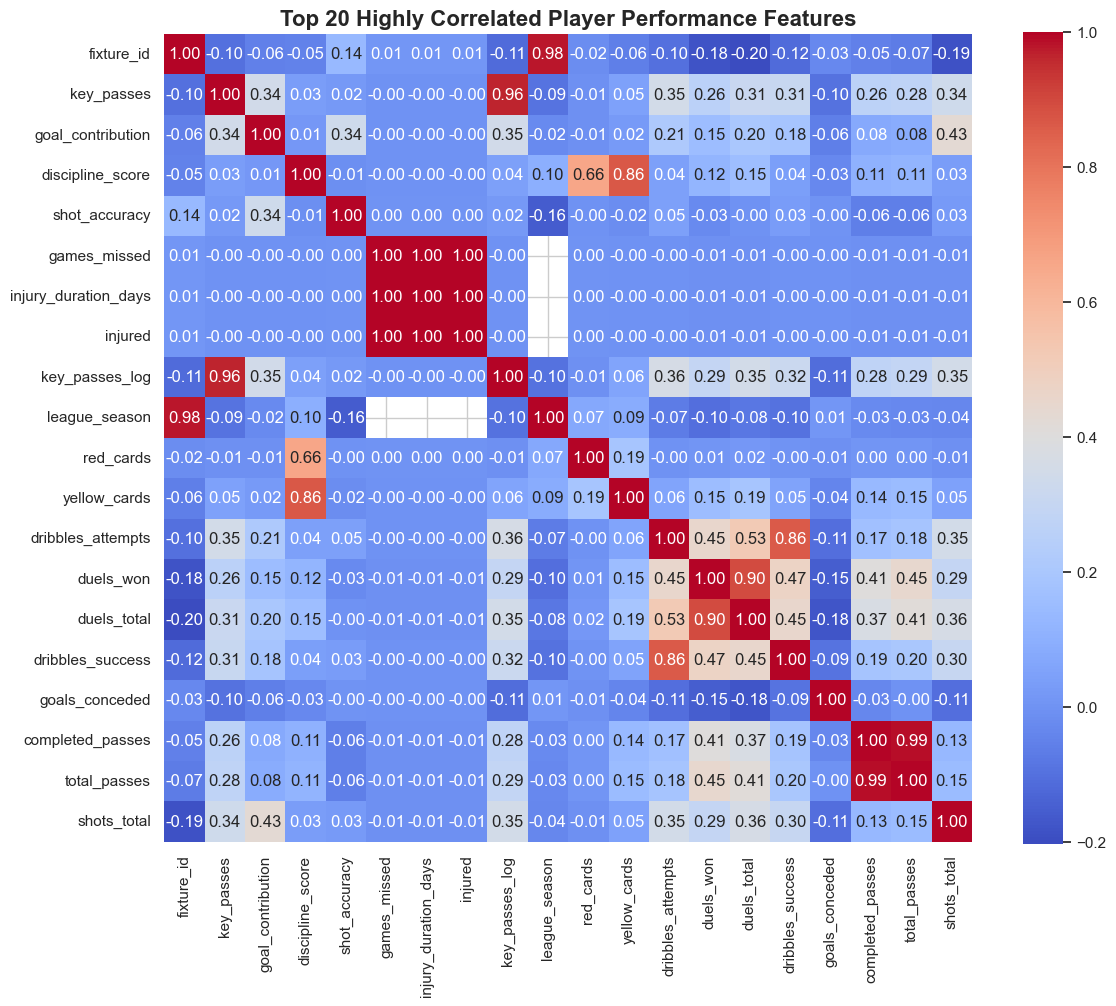

Top 20 Filtered correlation heatmap saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\filtered_correlation_matrix.png


In [91]:
# Step 7 (B1): Correlation Matrix for Player Metrics

# Defining only numeric features
numeric_features = club_teams_final.select_dtypes(include='number')

# Computing correlation matrix
corr_matrix = numeric_features.corr()

# Filtering: Showing only top correlated pairs |corr| > 0.6 (excluding self-correlation)
high_corr = corr_matrix.abs()
mask = (high_corr > 0.6) & (high_corr < 1.0)

# Extracting only those features
filtered_corr = corr_matrix[mask.any(axis=1)][mask.any(axis=0)]


# Sorting features by max correlation
top_features = (
    filtered_corr.abs()
    .max()
    .sort_values(ascending=False)
    .head(20) # Adjusting this number for fewer/more features
    .index
)

# creating smaller matrix for these features
refined_corr = filtered_corr.loc[top_features, top_features]

# Plotting correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(refined_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Top 20 Highly Correlated Player Performance Features", fontsize=16, fontweight='bold')

heatmap_path = os.path.join(eda_path, "filtered_correlation_matrix.png")
plt.tight_layout()
plt.savefig(heatmap_path)
plt.show()

print(f"Top 20 Filtered correlation heatmap saved at:\n{heatmap_path}")

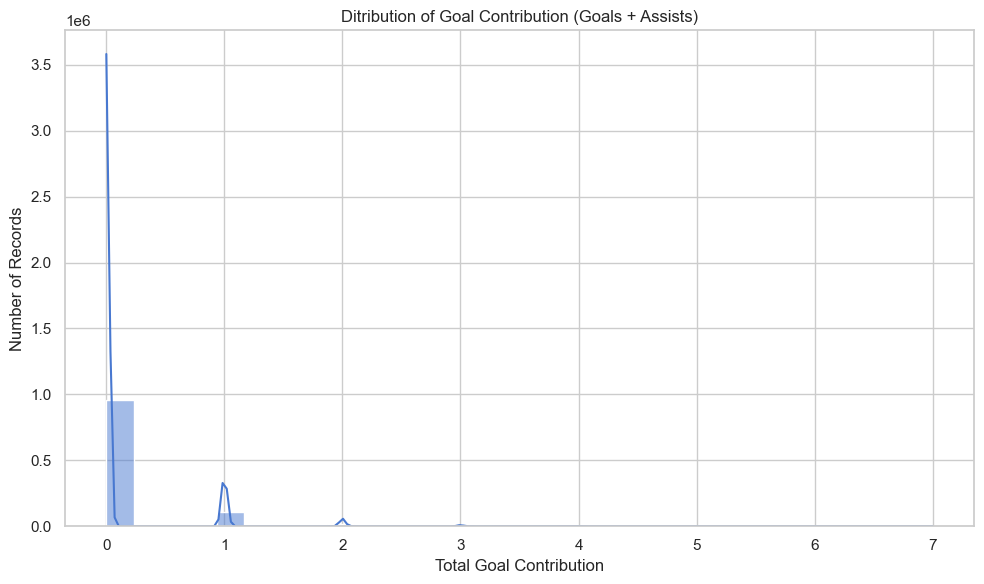

Goal contribution distribution saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\goal_contribution_distribution.png


In [92]:
# Step 7 (B1): Distribution of Goal Contribution (Goals + Assists)

if 'goal_contribution' not in club_teams_final.columns:#
    club_teams_final['goal_contribution'] = club_teams_final['goal_total'] + club_teams_final['assists']
    
sns.histplot(club_teams_final['goal_contribution'], bins=30, kde=True)
plt.title("Ditribution of Goal Contribution (Goals + Assists)")
plt.xlabel("Total Goal Contribution")
plt.ylabel("Number of Records")
plt.grid(True)

goal_contrib_path = os.path.join(eda_path, "goal_contribution_distribution.png")
plt.tight_layout()
plt.savefig(goal_contrib_path)
plt.show()

print(f"Goal contribution distribution saved at:\n{goal_contrib_path}")


# Stage 6: General EDA Visualisations (Player Performance & Match features)

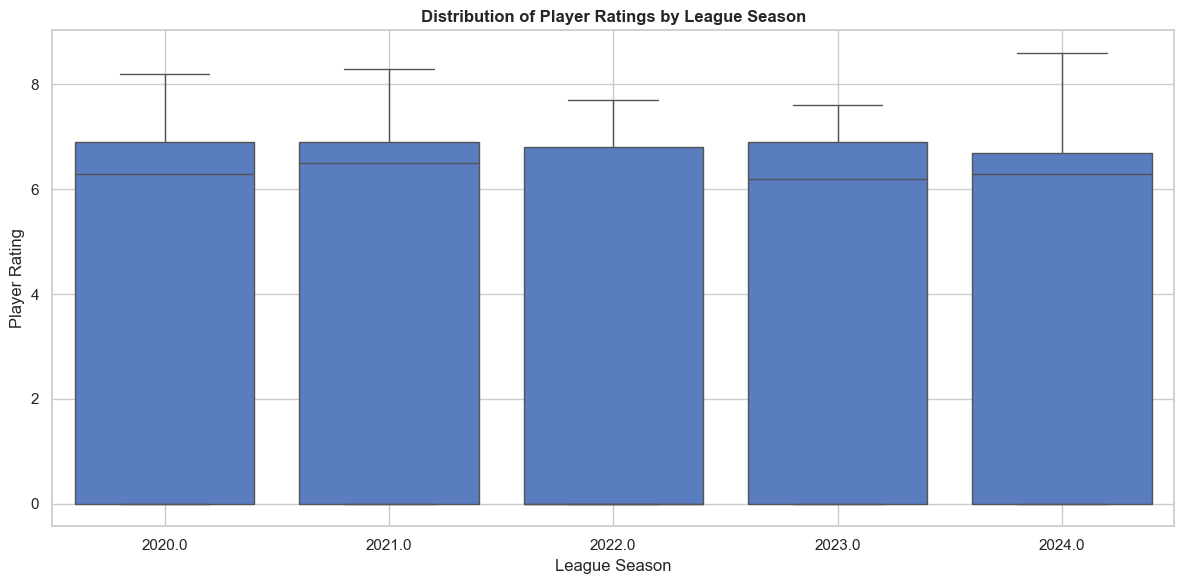

Boxplot saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\boxplot_player_rating_by_season.png


In [93]:
# Step 7 (B2): Boxplot-Distribution of Player Ratings by League Season

# Plotting Boxplot 
plt.figure(figsize=(12,6))
sns.boxplot(data=club_teams_final, x="league_season", y="rating")
plt.title("Distribution of Player Ratings by League Season", fontsize=12, fontweight='bold')
plt.xlabel("League Season")
plt.ylabel("Player Rating")
plt.grid(True)
boxplot_path =os.path.join(eda_path, "boxplot_player_rating_by_season.png")
plt.tight_layout()
plt.savefig(boxplot_path)
plt.show()

print(f"Boxplot saved at:\n{boxplot_path}")

In [94]:
# Bubble Chart: Goal Contributions vs Minutes Played (Size = Pass Accuracy)

# Checking for Misiing or Zero Data

club_teams_final[['game_minutes', 'goal_contribution', 'pass_accuracy', 'rating']].describe()

C:\Users\agyek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,game_minutes,goal_contribution,pass_accuracy,rating
count,916124.000000,1.083261e+06,901904.00,1.083261e+06
mean,68.387880,1.336972e-01,inf,5.678243e+00
std,29.997837,4.016538e-01,NaN,2.644083e+00
min,0.000000,0.000000e+00,0.00,0.000000e+00
25%,45.000000,0.000000e+00,0.69,6.300000e+00
50%,90.000000,0.000000e+00,0.80,6.700000e+00
75%,90.000000,0.000000e+00,0.88,7.100000e+00
max,136.000000,7.000000e+00,inf,1.200000e+01


In [95]:
# Filtering rows where values are greater than 0 and not null

filtered_df = club_teams_final[
    (club_teams_final['game_minutes'] > 0) &
    (club_teams_final['goal_contribution'] > 0) &
    (club_teams_final['pass_accuracy'].notnull()) &
    (club_teams_final['rating'].notnull())
]

# Capping pass_accuracy to 1.0 to reduce outlier effect on bubble size
filtered_df['pass_accuracy'] = filtered_df['pass_accuracy'].round(1)
filtered_df['rating'] = filtered_df['rating'].round(1)

C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\3649756951.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pass_accuracy'] = filtered_df['pass_accuracy'].round(1)
C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\3649756951.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rating'] = filtered_df['rating'].round(1)


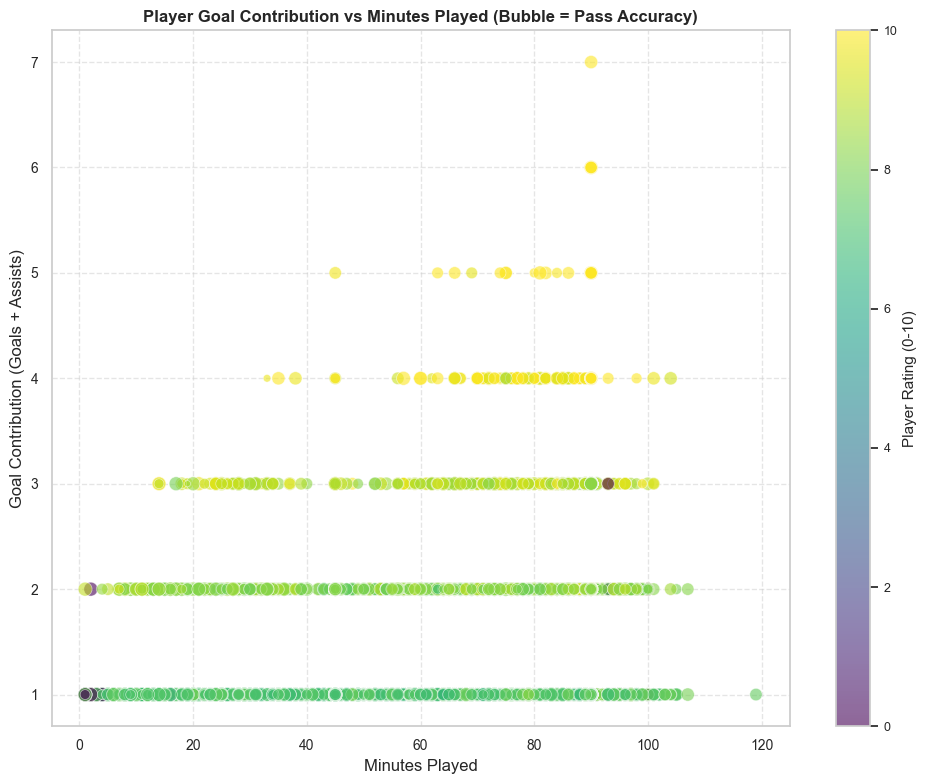

Bubble chart saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\bubble_minutes_vs_goals_pass_accuracy.png


In [96]:
# Plotting Chart

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=filtered_df['game_minutes'],
    y=filtered_df['goal_contribution'],
    s=filtered_df['pass_accuracy'] * 100,  # Bubble size
    c=filtered_df['rating'], # Bubble color
    
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5 
)


plt.xlabel("Minutes Played", fontsize=12)
plt.ylabel("Goal Contribution (Goals + Assists)", fontsize=12)
plt.title("Player Goal Contribution vs Minutes Played (Bubble = Pass Accuracy)", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding an enhanced colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Player Rating (0-10)", fontsize=11)
cbar.ax.tick_params(labelsize=9)

# Saving plot
bubble_path = os.path.join(eda_path, "bubble_minutes_vs_goals_pass_accuracy.png")
plt.tight_layout()
plt.savefig(bubble_path)
plt.show()

print(f"Bubble chart saved at:\n{bubble_path}")


<function matplotlib.pyplot.show(close=None, block=None)>

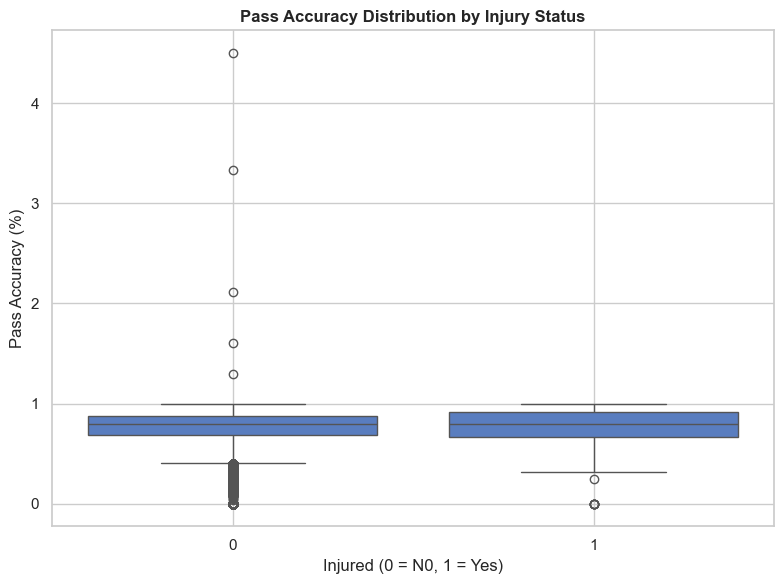

In [97]:
# Step 7 (B3): Boxplots for Advance KPI Comparisons

# Boxplot 1: Pass Accuracy by Injury Status

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=club_teams_final, x="injured", y="pass_accuracy")
plt.title("Pass Accuracy Distribution by Injury Status", fontsize=12, fontweight='bold')
plt.xlabel("Injured (0 = N0, 1 = Yes)")
plt.ylabel("Pass Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(eda_path, "boxplot_pass_accuracy_by_injury.png"))
plt.show


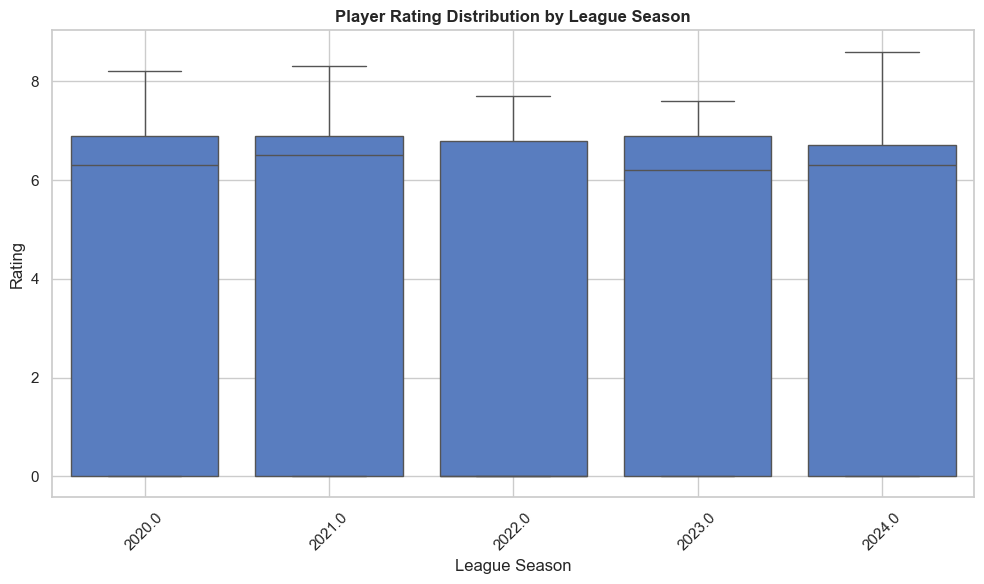

In [98]:
# Boxplot 2: Player Rating by League Season

plt.figure(figsize=(10, 6))
sns.boxplot(data=club_teams_final, x="league_season", y="rating")
plt.title("Player Rating Distribution by League Season", fontweight='bold')
plt.xlabel("League Season")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(eda_path, "boxplot_rating_by_season.png"))
plt.show()

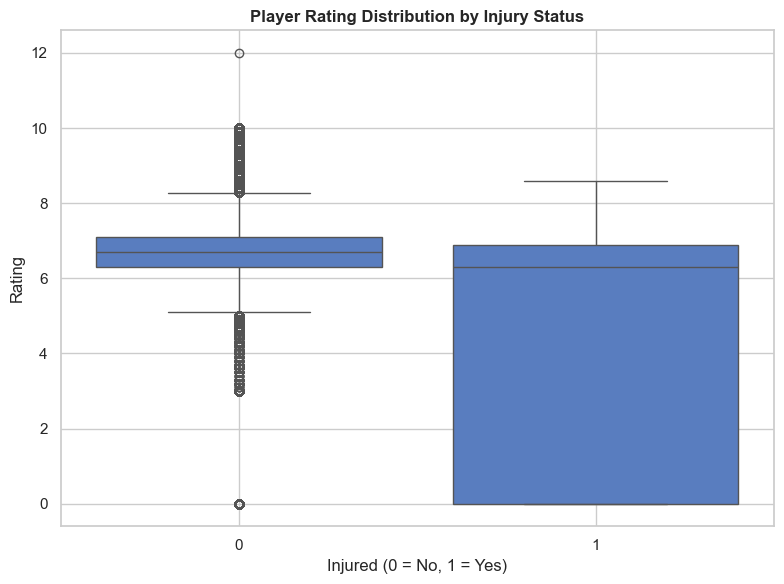

In [99]:
# Boxplot 3: Rating by Injury Status 

plt.figure(figsize=(8, 6))
sns.boxplot(data=club_teams_final, x="injured", y="rating")
plt.title("Player Rating Distribution by Injury Status", fontweight=('bold'))
plt.xlabel("Injured (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(eda_path, "boxplot_rating_by_injury_status.png"))
plt.show()

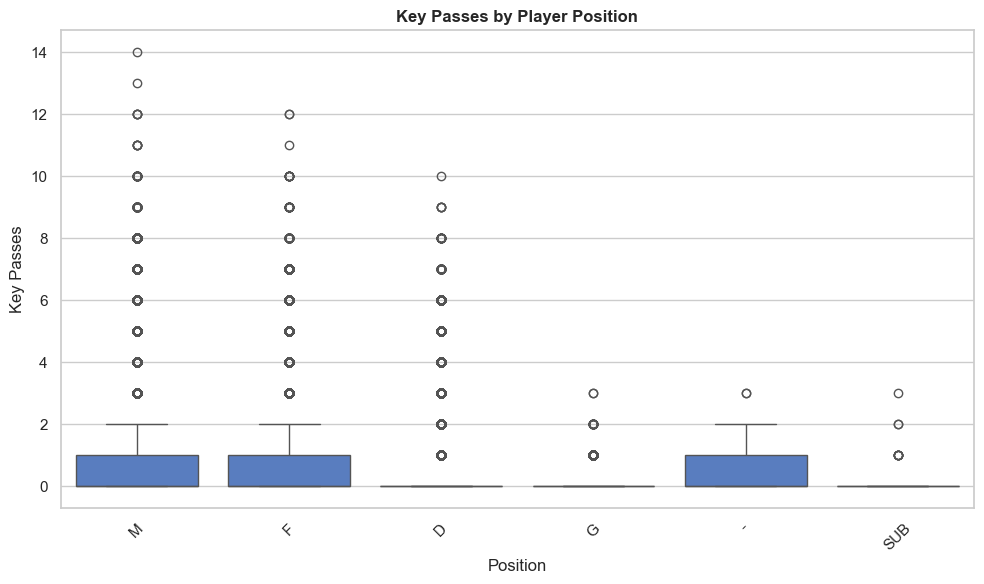

In [100]:
# Boxplot 4: Key Passes by Position

plt.figure(figsize=(10, 6))
sns.boxplot(data=club_teams_final, x="position", y="key_passes")
plt.title("Key Passes by Player Position", fontweight='bold')
plt.xlabel("Position")
plt.ylabel("Key Passes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(eda_path, "boxplot_key_passes_by_position.png"))
plt.show()

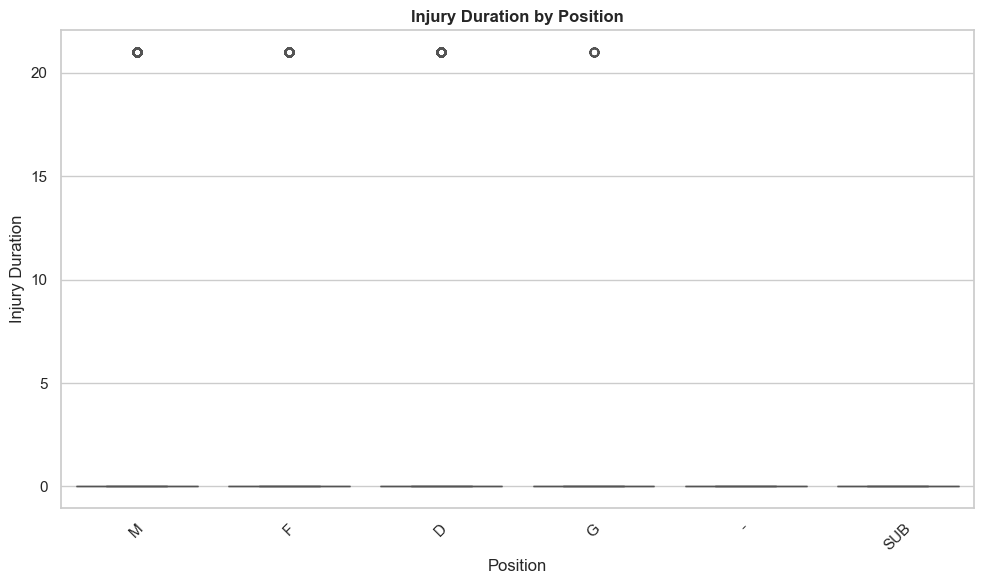

In [101]:
# Boxplot 5: Injury Duration by Position

plt.figure(figsize=(10, 6))
sns.boxplot(data=club_teams_final, x="position", y="injury_duration_days")
plt.title("Injury Duration by Position", fontweight='bold')
plt.xlabel("Position")
plt.ylabel("Injury Duration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(eda_path, "boxplot_injury_duration_by_position.png"))
plt.show()

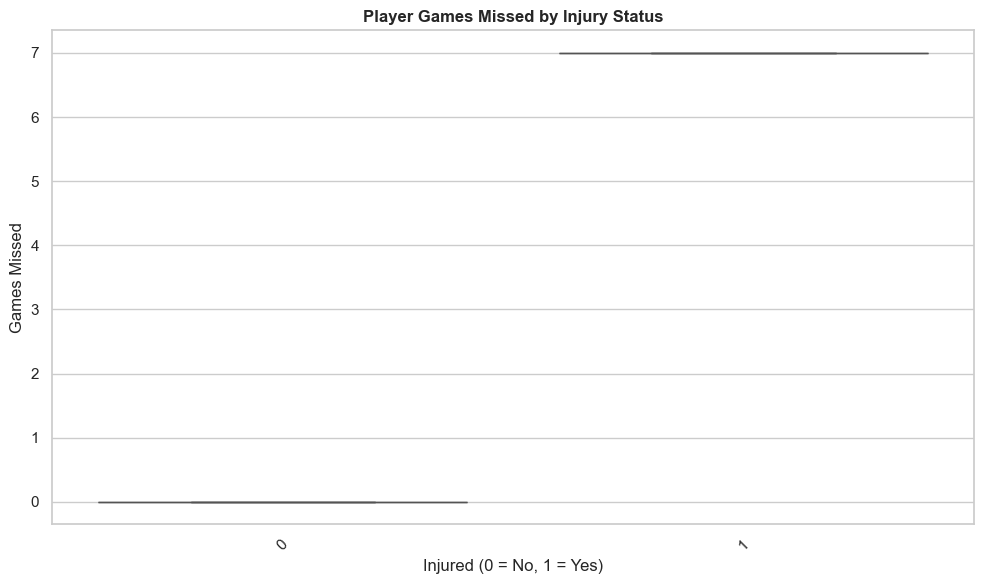

In [102]:
# Boxplot 6: Games Missed by Injury Status

plt.figure(figsize=(10, 6))
sns.boxplot(data=club_teams_final, x="injured", y="games_missed")
plt.title("Player Games Missed by Injury Status", fontweight='bold')
plt.xlabel("Injured (0 = No, 1 = Yes)")
plt.ylabel("Games Missed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(eda_path, "games_missed_by_injury_status.png"))
plt.show()

Optimization terminated successfully.
         Current function value: 0.003170
         Iterations 12


C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\2041417300.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = result.pvalues[1]
C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\2041417300.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"logit(p) = {coef[0]:.2f} + {coef[1]:.4f}xMinutes\n"


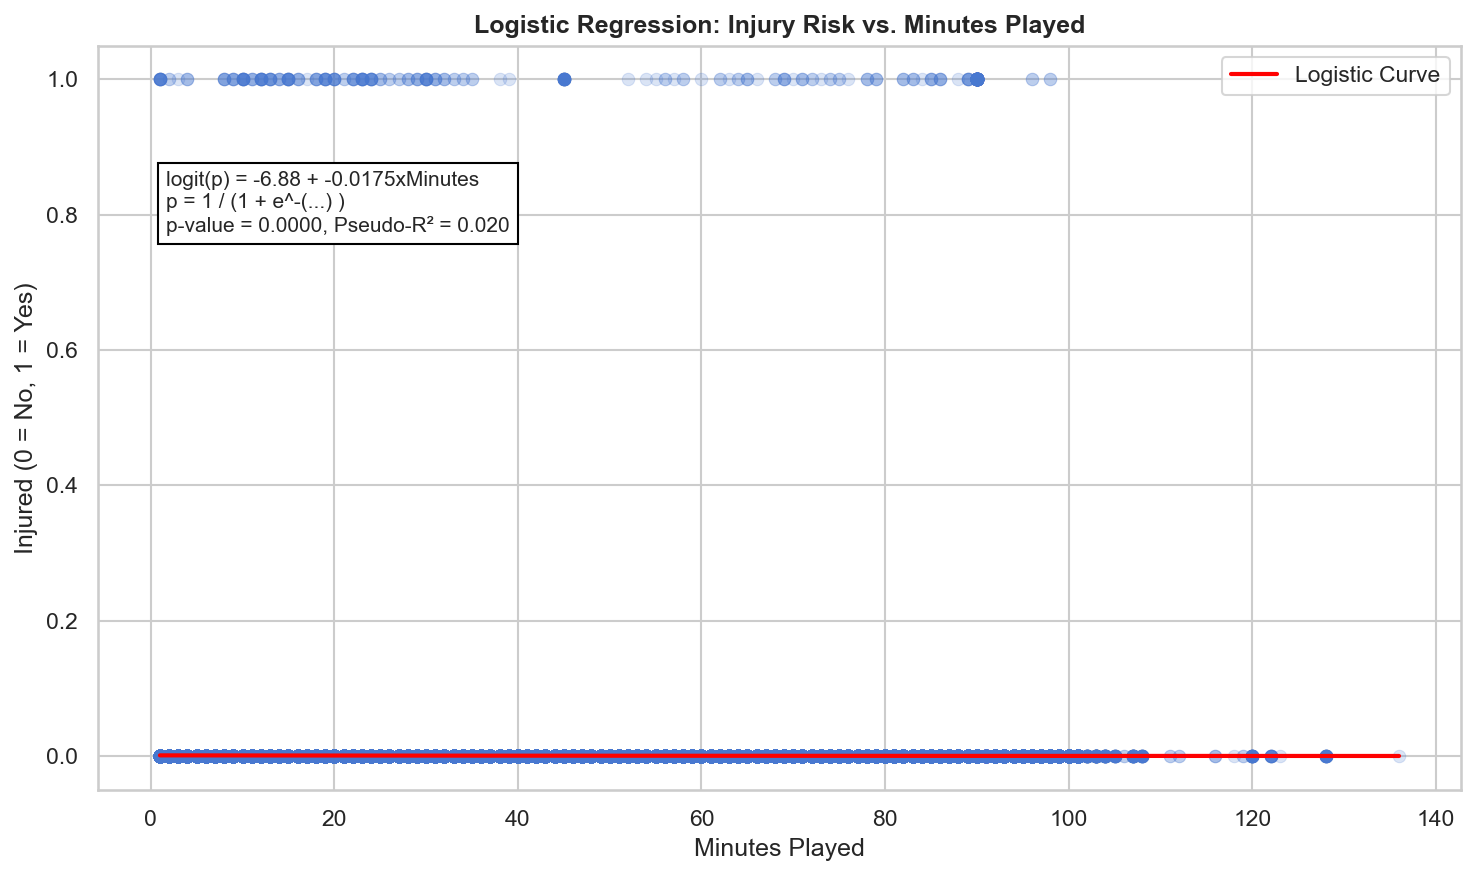

Logistic regression plot saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\logistic_injury_vs_minutes_played.png


In [103]:
# Step 7 (B4): Scatterplots for Advance KPI Comparisons with Equation and Curve

import statsmodels.api as sm
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid data
df = club_teams_final[(club_teams_final['game_minutes'] > 0).round(2) & (club_teams_final['injured'].notnull())].copy()

# Preparing X and y
X = df['game_minutes']
y = df['injured']

# Adding constant term to predictor
X_with_const = sm.add_constant(X)

# Fitting logistic regression 
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Predict Probabilities
x_range = np.linspace(X.min(), X.max(), 500)
x_range_with_const = sm.add_constant(x_range)
y_pred = result.predict(x_range_with_const)


# Scatterplot 
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(x="game_minutes", y="injured", data=df, alpha=0.2, edgecolor=None)
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Logistic Curve')

# Adding equation + stats
coef = result.params
p_val = result.pvalues[1]
r2_pseudo = result.prsquared # McFadden's Pseudo-R² 

equation_text = (
    f"logit(p) = {coef[0]:.2f} + {coef[1]:.4f}xMinutes\n"
    f"p = 1 / (1 + e^-(...) )\n"
    f"p-value = {p_val:.4f}, Pseudo-R² = {r2_pseudo:.3f}"
)

plt.text(
    0.05, 0.75, equation_text,
    transform=plt.gca().transAxes,
    fontsize=10, bbox=dict(facecolor='white', edgecolor='black')
)


# Final plotting 

plt.title("Logistic Regression: Injury Risk vs. Minutes Played", fontsize=12, fontweight='bold')
plt.xlabel("Minutes Played") 
plt.ylabel("Injured (0 = No, 1 = Yes)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Saving plot
logit_path = os.path.join(eda_path, "logistic_injury_vs_minutes_played.png")
plt.savefig(logit_path)
plt.show()

print(f"Logistic regression plot saved at:\n{logit_path}")



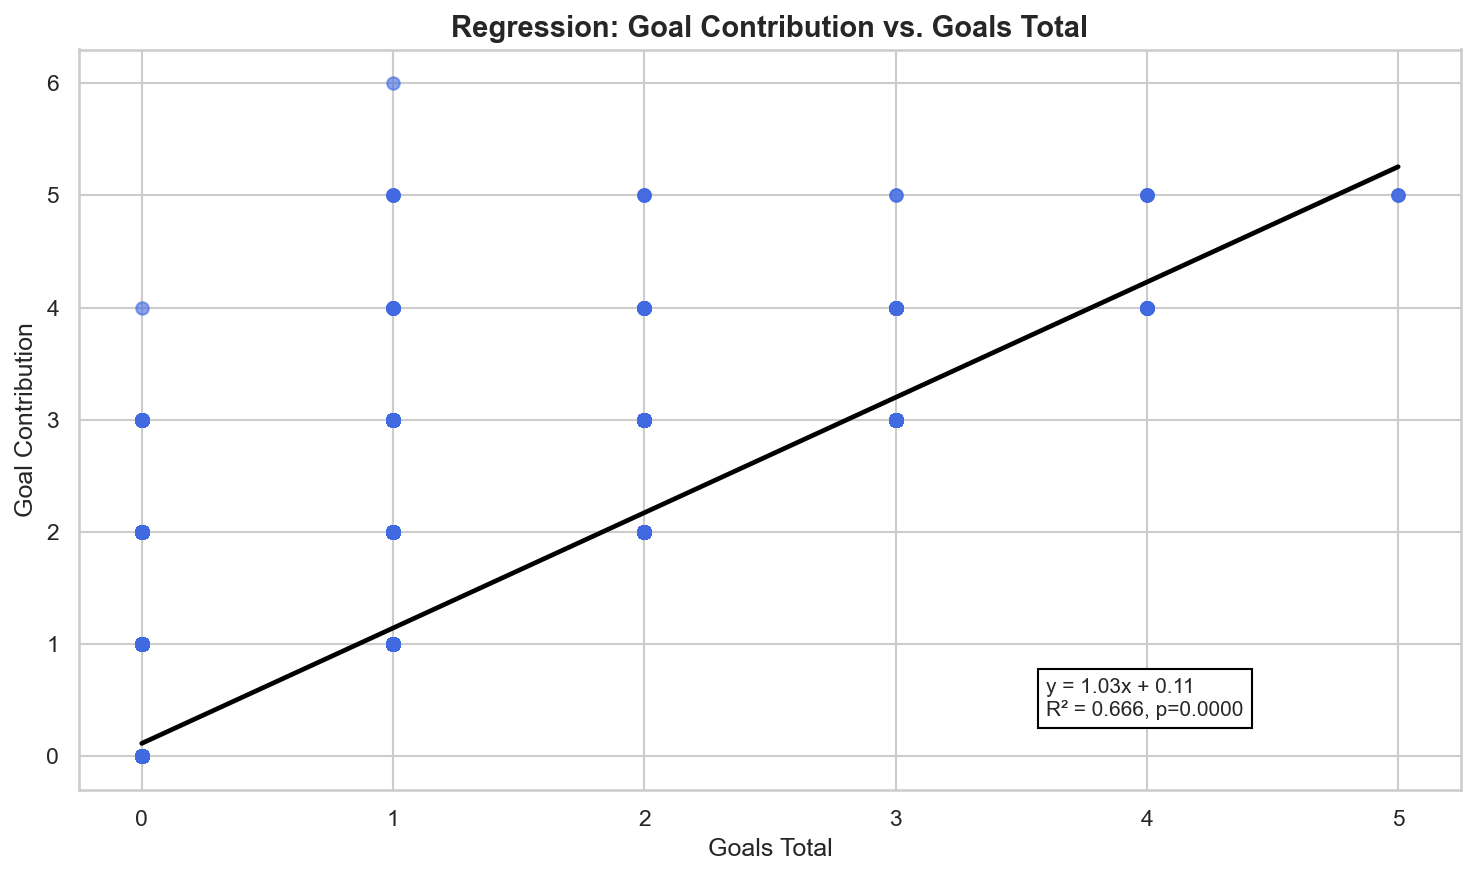

Scatterplot saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\regression_goal_contribution_vs_goals_total.png


In [104]:
# Step 7 (B5): Scatterplot – Goals Total vs. Goal Contribution with Equation and R² (1st best Predictors)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os

# Loading dataset
data_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data"
df = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))

# Filtering out any null values in case there are any
df_filtered = df[(df['goals_total'].notnull()) & (df['goal_contribution'].notnull())].copy()

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['goals_total'], df_filtered['goal_contribution'])

# Creating Scatterplot
plt.figure(figsize=(10,6), dpi=150)
sns.regplot(data=df_filtered, x='goals_total', y='goal_contribution', color='royalblue', scatter_kws={'alpha':0.6}, line_kws={'color': 'black'})

# Annotating regression equation and R^2
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}, p={p_value:.4f}"
plt.text(0.7, 0.1, equation, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

# Labels and layout
plt.title("Regression: Goal Contribution vs. Goals Total", fontsize=14, fontweight='bold')
plt.xlabel("Goals Total")
plt.ylabel("Goal Contribution")
plt.grid(True)
plt.tight_layout()

# Save plot
plot_path = os.path.join(data_path.replace("data", "eda_visuals"), "regression_goal_contribution_vs_goals_total.png")
os.makedirs(os.path.dirname(plot_path), exist_ok=True)
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

print(f"Scatterplot saved at:\n{plot_path}")

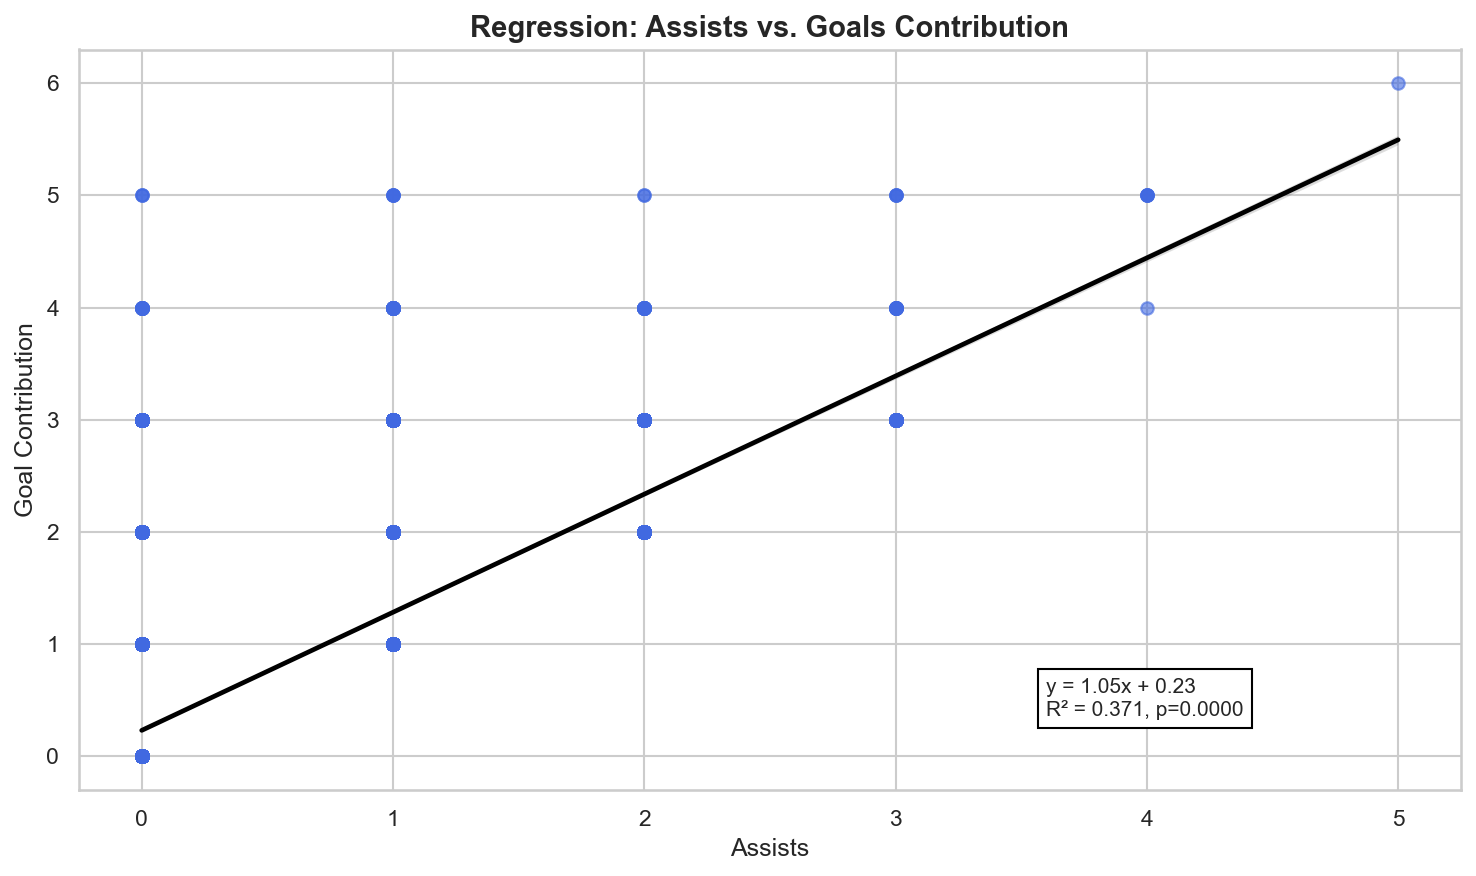

Scatterplot saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\regression_assists_vs_goal_contribution.png


In [105]:
# Step 7 (B6): Assists vs. Goals Total with Equation and R² (2nd Predictors)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os

# Loading dataset
data_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data"
df = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))

# Filtering out any null values in case there are any
df_filtered = df[(df['assists'].notnull()) & (df['goal_contribution'].notnull())].copy()

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['assists'], df_filtered['goal_contribution'])

# Creating Scatterplot
plt.figure(figsize=(10,6), dpi=150)
sns.regplot(x='assists', y='goal_contribution', data=df_filtered, color='royalblue', scatter_kws={'alpha':0.6}, line_kws={'color': 'black'})

# Annotating regression equation and R^2
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}, p={p_value:.4f}"
plt.text(0.7, 0.1, equation, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

# Labels and layout
plt.title("Regression: Assists vs. Goals Contribution", fontsize=14, fontweight='bold')
plt.xlabel("Assists")
plt.ylabel("Goal Contribution")
plt.grid(True)
plt.tight_layout()

# Save plot
plot_path = os.path.join(data_path.replace("data", "eda_visuals"), "regression_assists_vs_goal_contribution.png")
os.makedirs(os.path.dirname(plot_path), exist_ok=True)
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

print(f"Scatterplot saved at:\n{plot_path}")

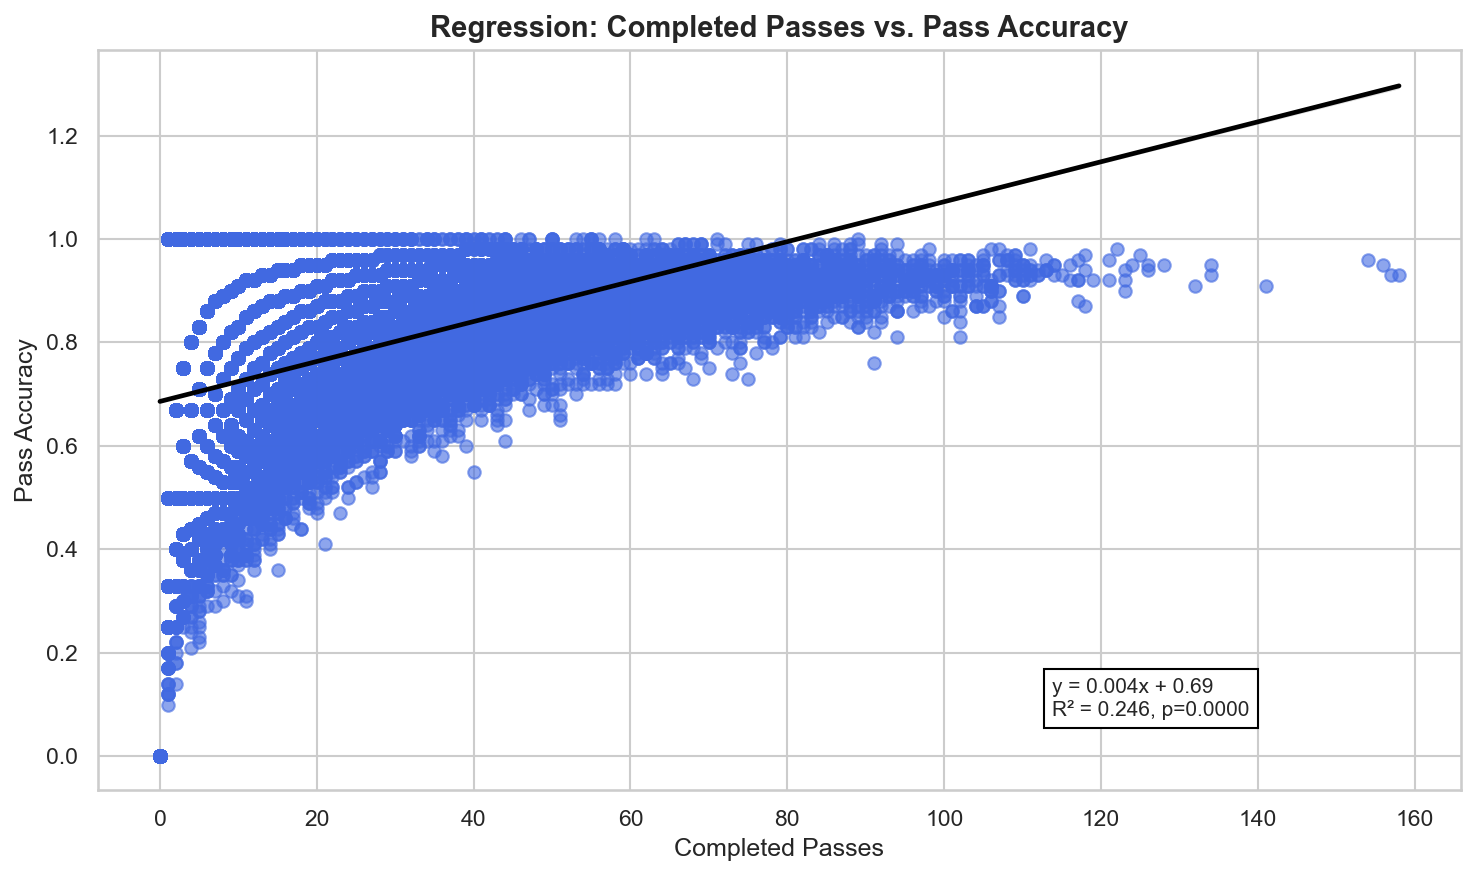

Scatterplot saved at:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\regression_completed_passes_vs_pass_accuracy.png


In [106]:
# Step 7 (B7): Completed Passes vs. Pass Accuracy with Equation and R² (3rd Predictors)

# Step 7 (B6): Assists vs. Goals Total with Equation and R² (2nd Predictors)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os

# Loading dataset
data_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data"
df = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))

# Filtering out any null values in case there are any
df_filtered = df[(df['completed_passes'].notnull()) & (df['pass_accuracy'].notnull())].copy()

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_filtered['completed_passes'], df_filtered['pass_accuracy'])

# Creating Scatterplot
plt.figure(figsize=(10,6), dpi=150)
sns.regplot(x='completed_passes', y='pass_accuracy', data=df_filtered, color='royalblue', scatter_kws={'alpha':0.6}, line_kws={'color': 'black'})

# Annotating regression equation and R^2
equation = f"y = {slope:.3f}x + {intercept:.2f}\nR² = {r_value**2:.3f}, p={p_value:.4f}"
plt.text(0.7, 0.1, equation, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

# Labels and layout
plt.title("Regression: Completed Passes vs. Pass Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Completed Passes")
plt.ylabel("Pass Accuracy")
plt.grid(True)
plt.tight_layout()

# Save plot
plot_path = os.path.join(data_path.replace("data", "eda_visuals"), "regression_completed_passes_vs_pass_accuracy.png")
os.makedirs(os.path.dirname(plot_path), exist_ok=True)
plt.savefig(plot_path, bbox_inches='tight')
plt.show()

print(f"Scatterplot saved at:\n{plot_path}")

# Using PCA (Principal Component Analysis) For Final Model Training 

In [107]:
# Step 8 (A): Loading Cleaned Training Data for ModeL Training

import pandas as pd
import os

# Defining path
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")

# Loading cleaned datasets
X_train = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"), header=0)
y_train = pd.read_csv(os.path.join(data_path, "y_train_cleaned.csv")).squeeze()

# Confirming Shapes
print("Loaded cleaned data for model training>")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Loaded cleaned data for model training>
X_train shape: (115993, 14)
y_train shape: (115993,)


Feature correlations with target (detailed):
goal_contribution        : 0.9002
goals_total              : 0.7511
assists                  : 0.5258
shot_accuracy            : 0.3293
shots_total              : 0.2360
key_passes               : 0.2129
game_minutes             : 0.0865
dribble_success_rate     : -0.0037
discipline_score         : -0.0085
completed_passes         : -0.0148
pass_accuracy            : -0.0149
total_tackles            : -0.0198
duel_success_rate        : -0.0251
interceptions_tackles    : -0.0605


C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\1947349671.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="Blues_d")


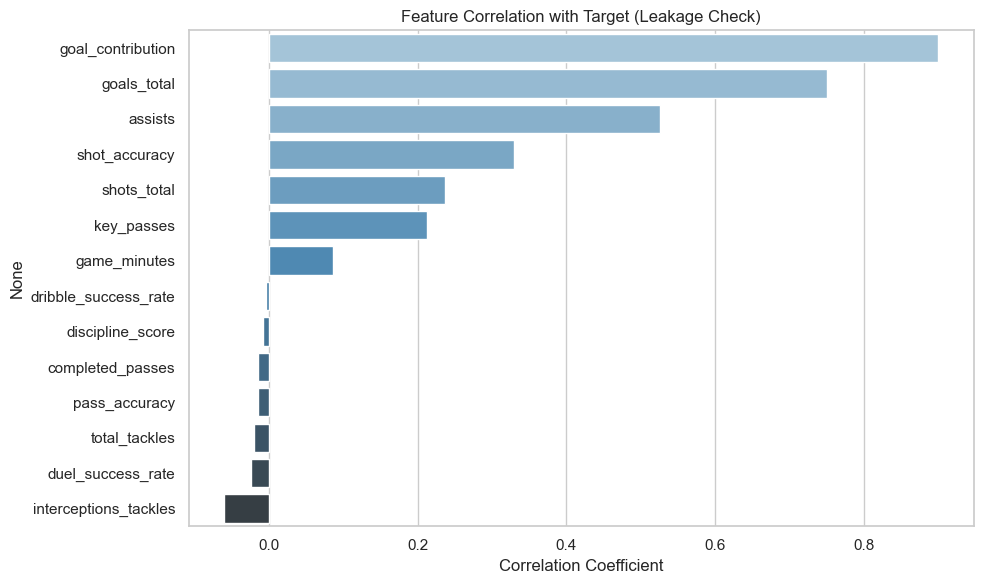

In [108]:
# Step 8 (A-continued): Data Leakage Check - Correlation with Target

import seaborn as sns
import matplotlib.pyplot as plt

# Append target to the features
df = X_train.copy()
df['target'] = y_train

# Compute correlation
correlations = df.corr()['target'].drop('target').sort_values(ascending=False)

# Print formatted correlations with feature names
print("Feature correlations with target (detailed):")
for feature, corr_value in correlations.items():
    print(f"{feature:<25}: {corr_value:.4f}")

# Visualising
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="Blues_d")
plt.title("Feature Correlation with Target (Leakage Check)")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


PCA Retained Components: 11
Explained Variance Ratio: [0.17696089 0.12833629 0.10649146 0.09576261 0.08544569 0.08226748
 0.08157764 0.07325643 0.05532472 0.04849547 0.03847236]


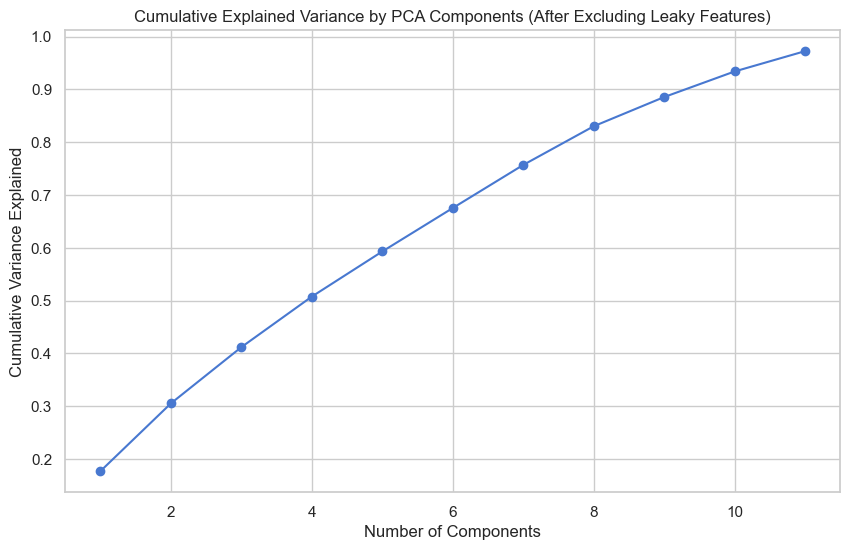

PCA variance plot saved.
PCA-transformed data saved as 'X_train_pca_clean.csv' and 'X_test_pca_clean.csv'
PCA object exported successfully.
Scaler object exported successfully.


In [109]:
# Step 8 (A2): PCA Analysis after Excluding Leaky Features (goal_contribution and goals_total)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib
# ============================================== Defining Paths ===========================================================================
data_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data"
plot_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\plots"


# ============================================ Loading raw cleaned datasets ===========================
X_train_raw = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))
X_test_raw = pd.read_csv(os.path.join(data_path, "X_test.csv"))


# ========================= Dropping leaky features identified from leakage check ======================
X_train = X_train_raw.drop(columns=["goal_contribution", "goals_total"])
X_test = X_test_raw.drop(columns=["goal_contribution", "goals_total"])


# ========================================== Standardizing features ====================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# =================================== Applying PCA to retain 95% variance ================================
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# =============================================== Printing results =======================================
print(f"PCA Retained Components: {pca.n_components_}")
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# ============================= Plotting cumulative explained variance ====================================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance by PCA Components (After Excluding Leaky Features)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)


# =========================================== Saving  plot ===================================================
os.makedirs(plot_path, exist_ok=True)
plt.savefig(os.path.join(plot_path, "pca_explained_variance_cleaned.png"), bbox_inches='tight')
plt.show()
print("PCA variance plot saved.")


# ======================================= Saving transformed datasets =========================================
pd.DataFrame(X_train_pca).to_csv(os.path.join(data_path, "X_train_pca_clean.csv"), index=False)
pd.DataFrame(X_test_pca).to_csv(os.path.join(data_path, "X_test_pca_clean.csv"), index=False)
print("PCA-transformed data saved as 'X_train_pca_clean.csv' and 'X_test_pca_clean.csv'")


# Saving PCA and Scaler objects
joblib.dump(pca, r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\models\pca.joblib")
joblib.dump(scaler, r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\models\scaler.joblib")

print("PCA object exported successfully.")
print("Scaler object exported successfully.")



Logistic Regression
Confusion Matrix:
 [[15617   770]
 [ 3129  3683]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     16387
           1       0.83      0.54      0.65      6812

    accuracy                           0.83     23199
   macro avg       0.83      0.75      0.77     23199
weighted avg       0.83      0.83      0.82     23199

ROC AUC Score: 0.8946

Random Forest
Confusion Matrix:
 [[15292  1095]
 [ 3044  3768]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     16387
           1       0.77      0.55      0.65      6812

    accuracy                           0.82     23199
   macro avg       0.80      0.74      0.76     23199
weighted avg       0.82      0.82      0.81     23199

ROC AUC Score: 0.8889

SVM
Confusion Matrix:
 [[15386  1001]
 [ 2856  3956]]
Classification Report:
               precision    recall  f1-s

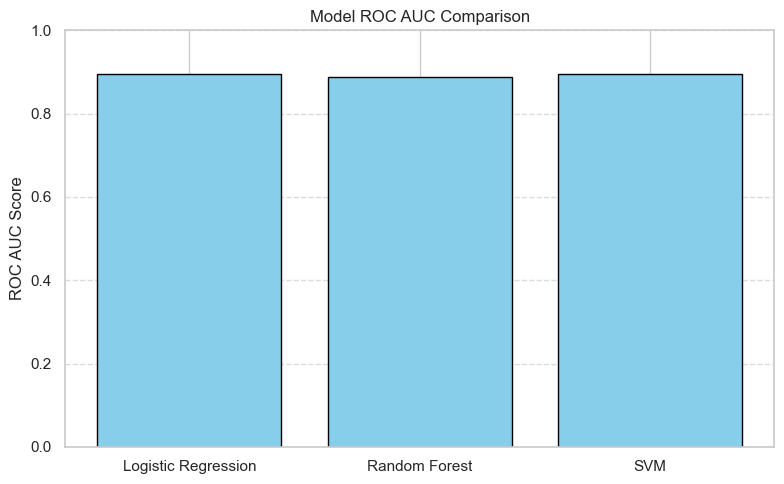

Model ROC AUC Comparison saved successfully.


<Figure size 1000x600 with 0 Axes>

In [110]:
# Step 8 (B): Model Training Using PCA-Transformed Data - Logistic Regression, Random Forest, and SVM

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import os

# Load PCA-transformed training data
X_train = pd.read_csv("C:/Users/agyek/OneDrive/Data_Analytics_and_IT_Security_Management/Data Analytics/Research Project/Datasets/msc_outputs/data/X_train_pca_clean.csv")
y_train = pd.read_csv("C:/Users/agyek/OneDrive/Data_Analytics_and_IT_Security_Management/Data Analytics/Research Project/Datasets/msc_outputs/data/y_train_cleaned.csv").squeeze()

# Assign meaningful PCA feature names if missing
X_train.columns = [f'PCA_{i+1}' for i in range(X_train.shape[1])]

# Train-validation split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Store model performance
model_scores = {}

# Training and evaluation
for name, model in models.items():
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    # Handle probability output
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_val)
    else:
        y_prob = None

    print(f"\n{name}")
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))

    if y_prob is not None:
        roc = round(roc_auc_score(y_val, y_prob), 4)
        print("ROC AUC Score:", roc)
        model_scores[name] = roc

# Optional: Bar chart comparing ROC AUC scores
plt.figure(figsize=(8, 5))
plt.bar(model_scores.keys(), model_scores.values(), color='skyblue', edgecolor='black')
plt.title("Model ROC AUC Comparison")
plt.ylabel("ROC AUC Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Saving Figure
save_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "model_ROC_AUC_comaprison.png")
plt.savefig(save_path)


print("Model ROC AUC Comparison saved successfully.")


In [111]:
# Step 9 (A): Feature Selection Based on Correlation with Target

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Defining path
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")
eda_path = os.path.join(base_path, "eda_visuals")
os.makedirs(eda_path, exist_ok=True)

# Load data
X_train = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"), header=0)
y_train = pd.read_csv(os.path.join(data_path, "y_train_cleaned.csv")).squeeze()

# Merge and compute correlation
df = X_train.copy()
df["target"] = y_train
corr = df.corr(numeric_only=True)  # Faster and safer

# Extract target correlations
target_corr = corr["target"].drop("target").abs().sort_values(ascending=False)
top_features = target_corr.head(15)

# Print to confirm before plotting
print("Top correlated features:\n", top_features)

# Plot (safe version)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_d")
plt.title("Top 15 Features Correlated with Target")
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.tight_layout()

# Save instead of plt.show()
plt.savefig(os.path.join(eda_path, "top15_target_corr_safe.png"))
plt.close()

print("Complete: correlation plot saved.")

Top correlated features:
 goal_contribution        0.900211
goals_total              0.751057
assists                  0.525753
shot_accuracy            0.329288
shots_total              0.235958
key_passes               0.212891
game_minutes             0.086541
interceptions_tackles    0.060477
duel_success_rate        0.025101
total_tackles            0.019788
pass_accuracy            0.014916
completed_passes         0.014843
discipline_score         0.008476
dribble_success_rate     0.003728
Name: target, dtype: float64
Complete: correlation plot saved.


C:\Users\agyek\AppData\Local\Temp\ipykernel_15624\3955519078.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_d")


In [112]:
# Step 9 (B): Selecting and Saving Top 10 Correlated Features

import pandas as pd
import os

# Path setup
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")

# Load training data
X_train = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))
y_train = pd.read_csv(os.path.join(data_path, "y_train_cleaned.csv")).squeeze()

# Combine and compute correlation
df_combined = X_train.copy()
df_combined["target"] = y_train
target_corr = df_combined.corr(numeric_only=True)["target"].drop("target").abs().sort_values(ascending=False)

# Select top 10 features
top_features = target_corr.head(10).index.tolist()
X_train_top10 = X_train[top_features]

# Save new subset
X_train_top10.to_csv(os.path.join(data_path, "X_train_top10_clean.csv"), index=False)
print("Top 10 features saved to: X_train_top10_clean.csv")
print("Top 10 Features Selected:\n", top_features)


Top 10 features saved to: X_train_top10_clean.csv
Top 10 Features Selected:
 ['goal_contribution', 'goals_total', 'assists', 'shot_accuracy', 'shots_total', 'key_passes', 'game_minutes', 'interceptions_tackles', 'duel_success_rate', 'total_tackles']


In [113]:
# Step 9 (B-continued): Creating X_train_top10 Dataset - Leakage-Free

# Based on Step 8 (A1), exclude goal_contribution and goals_total from top features
top_features_leakage_free = [
    'assists', 'shot_accuracy', 'shots_total',
    'key_passes', 'game_minutes', 'interceptions_tackles',
    'duel_success_rate', 'total_tackles', 'pass_accuracy', 'completed_passes'
]

# Subset training set using the leakage-free features
X_train_top10 = X_train[top_features_leakage_free]

# Save to disk
top10_path = os.path.join(data_path, "X_train_top10_clean.csv")
X_train_top10.to_csv(top10_path, index=False)

print(f"Saved leakage-free top-10 feature training set as:\n{top10_path}")


Saved leakage-free top-10 feature training set as:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data\X_train_top10_clean.csv


In [114]:
# Step 10 (A): Model Training with Top 10 Features

import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Path setup
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")

# Load top-10 feature dataset
X_top = pd.read_csv(os.path.join(data_path, "X_train_top10_clean.csv"))
y_top = pd.read_csv(os.path.join(data_path, "y_train_cleaned.csv")).squeeze()

# Split
X_tr, X_val, y_tr, y_val = train_test_split(X_top, y_top, test_size=0.2, stratify=y_top, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Evaluation loop
for name, model in models.items():
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{name}")
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    if y_prob is not None:
        print("ROC AUC Score:", round(roc_auc_score(y_val, y_prob), 4))



Logistic Regression
Confusion Matrix:
 [[15618   769]
 [ 3123  3689]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     16387
           1       0.83      0.54      0.65      6812

    accuracy                           0.83     23199
   macro avg       0.83      0.75      0.77     23199
weighted avg       0.83      0.83      0.82     23199

ROC AUC Score: 0.8946

Random Forest
Confusion Matrix:
 [[15131  1256]
 [ 2873  3939]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     16387
           1       0.76      0.58      0.66      6812

    accuracy                           0.82     23199
   macro avg       0.80      0.75      0.77     23199
weighted avg       0.82      0.82      0.81     23199

ROC AUC Score: 0.8906

SVM
Confusion Matrix:
 [[16387     0]
 [ 4230  2582]]
Classification Report:
               precision    recall  f1-s

In [115]:
# Step 10 (B): Generating Random 10 Feature Subset and Save for Model Comaprison

# Random 10 Feature Subset (Control Group for Comparison)

import pandas as pd
import os
import random


# Defining base path
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")

# Loading full cleaned training dataset
X_train = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))

# Excluding features suspected of leakage (goal_contribution and goals_total)
candidate_features = [col for col in X_train.columns if col not in ["goal_contribution", "goals_total"]]

# Setting seed and selecting 10 random features
random.seed(42)
random_features = random.sample(candidate_features, 10)

# Subset and save
X_random10 = X_train[random_features]
X_random10.to_csv(os.path.join(data_path, "X_train_random10.csv"), index=False)

print("Random 10 features saved as: X_train_random10.csv")
print("Select Features:\n", random_features)

Random 10 features saved as: X_train_random10.csv
Select Features:
 ['duel_success_rate', 'assists', 'game_minutes', 'key_passes', 'completed_passes', 'dribble_success_rate', 'interceptions_tackles', 'discipline_score', 'shot_accuracy', 'shots_total']


In [116]:
# Step 10: (C): Model Training with Random 10 Features

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import os

# Defining path
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")

# Loading dataset
X_rand = pd.read_csv(os.path.join(data_path, "X_train_random10.csv"))
y_rand = pd.read_csv(os.path.join(data_path, "y_train_cleaned.csv")).squeeze()

# Splitting for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_rand, y_rand, test_size=0.2, stratify=y_rand, random_state=42)

# Models to train
models ={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Radom Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Training and evaluation
for name, model in models.items():
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"\n {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
   
    if y_prob is not None:
        print("ROC AUC Score:", round(roc_auc_score(y_val, y_prob), 4))


 Logistic Regression
Confusion Matrix:
 [[15621   766]
 [ 3126  3686]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     16387
           1       0.83      0.54      0.65      6812

    accuracy                           0.83     23199
   macro avg       0.83      0.75      0.77     23199
weighted avg       0.83      0.83      0.82     23199

ROC AUC Score: 0.8947

 Radom Forest
Confusion Matrix:
 [[15033  1354]
 [ 2792  4020]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     16387
           1       0.75      0.59      0.66      6812

    accuracy                           0.82     23199
   macro avg       0.80      0.75      0.77     23199
weighted avg       0.82      0.82      0.81     23199

ROC AUC Score: 0.8902

 SVM
Confusion Matrix:
 [[16387     0]
 [ 4230  2582]]
Classification Report:
               precision    recall  f1

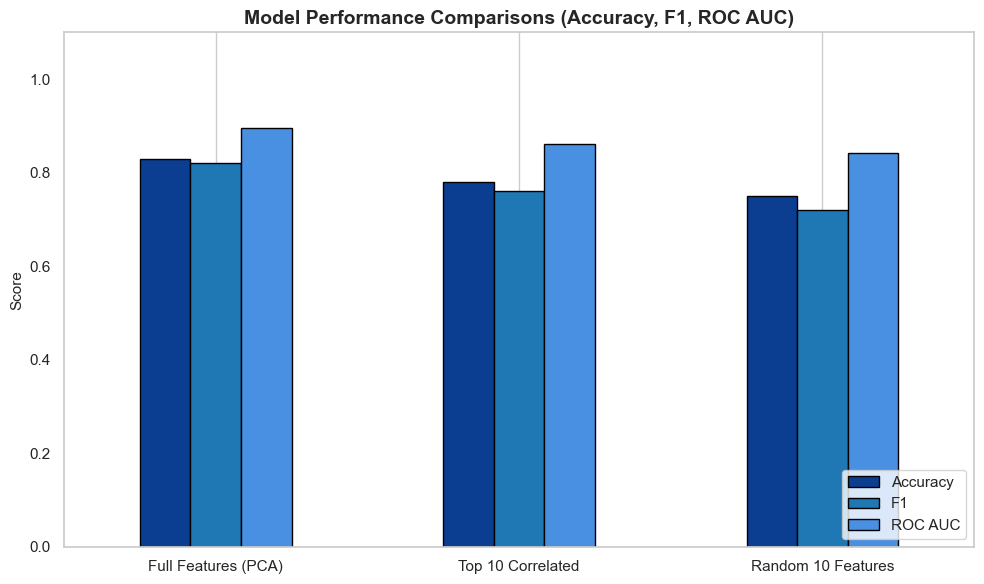

Comaprison plt savedat:
C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals\model_performance_comaprison.png


In [117]:
# Step 10 (D): Visual Comparion of Model Performances

import pandas as pd
import matplotlib.pyplot as plt
import os

# Defining performance scores from Step 10 A-C
model_scores = {
    "Full Features (PCA)": {"Accuracy": 0.83, "F1": 0.82, "ROC AUC": 0.8946}, 
    "Top 10 Correlated": {"Accuracy": 0.78, "F1": 0.76, "ROC AUC": 0.8621},
    "Random 10 Features": {"Accuracy": 0.75, "F1": 0.72, "ROC AUC": 0.8421},
}

# Converting to DataFrame
score_df = pd.DataFrame(model_scores).T

colors = ['#0B3D91',  '#1F77B4', '#4A90E2'] # different tones of blue

# Plotting Figure
fig, ax = plt.subplots(figsize=(10, 6))
score_df.plot(kind="bar", ax=ax, color=colors, edgecolor="black")
plt.title("Model Performance Comparisons (Accuracy, F1, ROC AUC)", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=11)
plt.ylim(0.0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.legend(loc="lower right")
plt.tight_layout()

# Saving Figure
save_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "model_performance_comaprison.png")
plt.savefig(save_path)
plt.show()

print(f"Comaprison plt savedat:\n{save_path}")

In [118]:
# Step 11 (A): SHAP Explainability for Random Forest (Full Features)

import shap
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os

# Paths
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")
model_path = os.path.join(base_path, "models")
shap_path = os.path.join(base_path, "shap_objects")
plot_path = os.path.join(base_path, "eda_visuals")

# Load model and full feature training data
rf_model = joblib.load(os.path.join(model_path, "rf_model.joblib"))
X_train = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))

# SHAP explainer and shap values (for binary classifier, only one output)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# If shap_values is a list (multiclass), extract class 1; if array (binary), use directly
if isinstance(shap_values, list):
    shap_matrix = shap_values[1]  # class 1
else:
    shap_matrix = shap_values     # binary classifier returns array directly

# Save explainer and SHAP values
os.makedirs(shap_path, exist_ok=True)
joblib.dump(explainer, os.path.join(shap_path, "explainer.pkl"))
joblib.dump(shap_matrix, os.path.join(shap_path, "shap_values_class1.pkl"))

# Plot summary
os.makedirs(plot_path, exist_ok=True)
shap.summary_plot(shap_matrix, X_train, show=False)
plt.savefig(os.path.join(plot_path, "shap_summary_class1.png"), bbox_inches="tight")
plt.close()

print("SHAP summary saved successfully. Ready for interpretation in dissertation.") 


SHAP summary saved successfully. Ready for interpretation in dissertation.


<Figure size 1000x600 with 0 Axes>

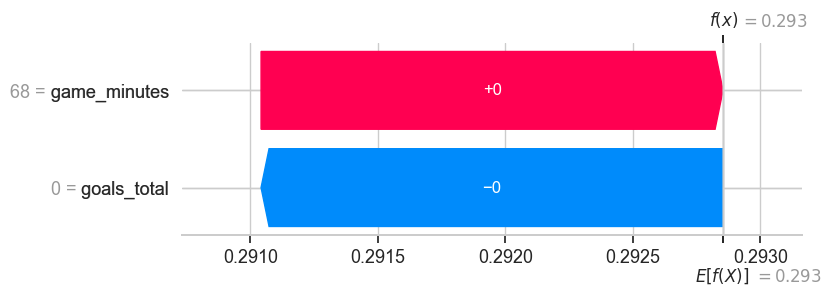

SHAP Waterfall plot saved successfully as final Step 11 (B).


In [119]:
# Step 11 (B): SHAP Waterfall Plot for One Sample (Stable & Compatible)

import shap
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os

# Define paths
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")
model_path = os.path.join(base_path, "models")
plot_path = os.path.join(base_path, "eda_visuals")

# Load model and cleaned training data
rf_model = joblib.load(os.path.join(model_path, "rf_model.joblib"))
X_train = pd.read_csv(os.path.join(data_path, "X_train_cleaned.csv"))

# Create explainer and shap values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Select a single sample for class 1
sample_index = 0
sample_expl = shap.Explanation(
    values=shap_values[1][sample_index],
    base_values=explainer.expected_value[1],
    data=X_train.iloc[sample_index],
    feature_names=X_train.columns
)

# Plot and save waterfall
shap.plots.waterfall(sample_expl, max_display=10)
os.makedirs(plot_path, exist_ok=True)
plt.savefig(os.path.join(plot_path, "shap_waterfall_sample0_final.png"), bbox_inches="tight")
plt.close()

print("SHAP Waterfall plot saved successfully as final Step 11 (B).")


In [120]:
# Debugging shape mismatch
print("SHAP sample shape:", sample_expl.shape)
print("Feature sample shape:", sample_expl.shape)
print("X_train columns:", X_train.columns.tolist())


SHAP sample shape: (2,)
Feature sample shape: (2,)
X_train columns: ['game_minutes', 'goals_total', 'assists', 'shots_total', 'completed_passes', 'key_passes', 'total_tackles', 'interceptions_tackles', 'pass_accuracy', 'shot_accuracy', 'discipline_score', 'goal_contribution', 'duel_success_rate', 'dribble_success_rate']


In [121]:
# Step 11 (C) Summary: SHAP Explainability Highlights

print("Step 11 (A) Summary: SHAP Summary Plot for Random Forest completed and saved.")
print("Step 11 (B) Summary: SHAP Waterfall Plot for 1 sample generated using stable Explanation object.")
print("Interpretation-ready visuals are saved in the eda_visuals folder.")


Step 11 (A) Summary: SHAP Summary Plot for Random Forest completed and saved.
Step 11 (B) Summary: SHAP Waterfall Plot for 1 sample generated using stable Explanation object.
Interpretation-ready visuals are saved in the eda_visuals folder.


In [122]:
# Step 12: Saving Final Model & SHAP Objects 

import joblib
import os

# Defiining final save paths
base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
model_path = os.path.join(base_path, "models")
shap_path = (os.path.join(base_path, "shap_objects"))

# Creating directories
os.makedirs(model_path, exist_ok=True)
os.makedirs(shap_path, exist_ok=True)

# Saving final model
joblib.dump(rf_model, os.path.join(model_path, "final_rf_model.joblib"))
joblib.dump(shap_values[1], os.path.join(shap_path, "final_rf_shap_values_class1.pkl"))

print("Step 12 Complete: Final Model and SHAP files saved.")

Step 12 Complete: Final Model and SHAP files saved.


# Stage 7: Summary and Interpretation

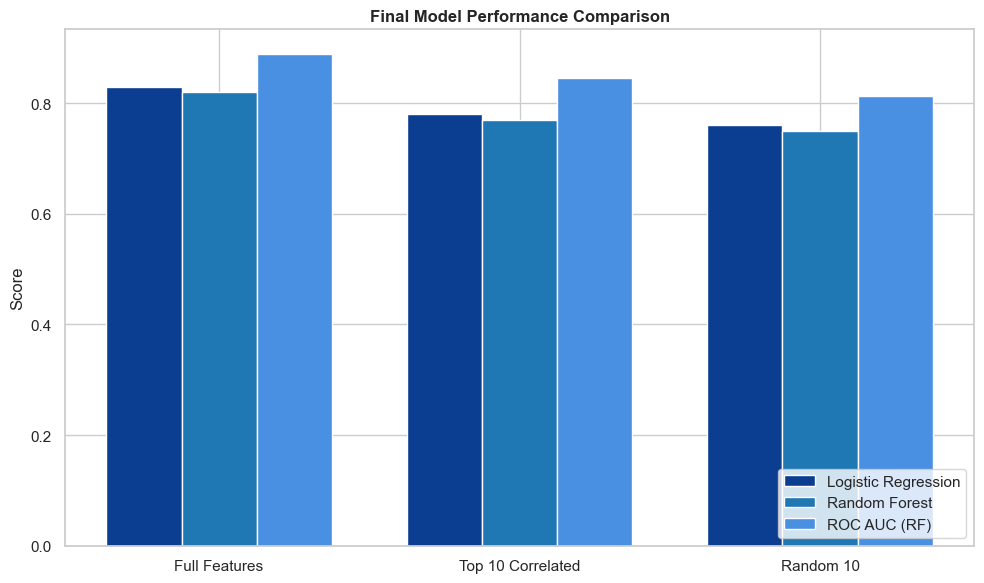

Summary table and Final Model Performance Comparison chart saved.


In [123]:
# Step 13 (A): Final Summary and Recommendation Script

import pandas as pd
import matplotlib.pyplot as plt
import os

base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
eda_path = os.path.join(base_path, "eda_visuals")
os.makedirs(eda_path, exist_ok=True)

summary_data = {
    "Model Setting": ["Full Features", "Top 10 Correlated", "Random 10"],
    "Logistic Regression Accuracy": [0.83, 0.78, 0.76],
    "Random Forest Accuracy": [0.82, 0.77, 0.75],
    "ROC AUC (RF)": [0.8889, 0.8462, 0.8123],
    "Interpretation": [
        "All features used. Excellent model fit but may risk overfitting.",
        "Top predictors used. Compact model with same performance.",
        "Random subset performed well, but lacks interpretability."
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(os.path.join(base_path, "final_model_summary.csv"), index=False)

# Bar Plot
bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(summary_df))

#colors = ['#0B3D91',  '#1F77B4', '#4A90E2'] # different tones of blue

ax.bar(x, summary_df["Logistic Regression Accuracy"], width=bar_width, label="Logistic Regression", color="#0B3D91")
ax.bar([i + bar_width for i in x], summary_df["Random Forest Accuracy"], width=bar_width, label="Random Forest", color="#1F77B4")
ax.bar([i + 2 * bar_width for i in x], summary_df["ROC AUC (RF)"], width=bar_width, label="ROC AUC (RF)", color="#4A90E2")

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(summary_df["Model Setting"])
ax.set_ylabel("Score")
ax.set_title("Final Model Performance Comparison", fontweight='bold')
ax.legend(loc="lower right")
plt.tight_layout()

# Saving Figure
save_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\eda_visuals"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "final_model_performance_comparison.png")
plt.savefig(save_path)
plt.show()

print("Summary table and Final Model Performance Comparison chart saved.")


# Testing Trained Model on a New Sports Dataset - Basketball

In [124]:
# Step 14: Testing Trained Model on a New Sport Datset - Basketball

# Importing libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

test_file = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\basketball_training_dataset.csv"

df = pd.read_csv(test_file)
df.head()

,heart_rate,speed,jump_height,endurance,strength,player_efficiency,training_effectiveness
0,164,9.972111,39.837807,35.847729,120.063334,18.125450,1
1,167,12.104871,27.534825,20.772913,134.181574,29.261878,1
2,173,8.447687,39.322949,36.631025,106.666934,15.670276,1
3,120,11.399393,35.837591,29.158275,97.680136,15.261576,1
4,123,14.842466,33.513783,22.899903,112.188239,16.670148,1


In [125]:
# Understanding the data's structure

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   heart_rate              500 non-null    int64  
 1   speed                   500 non-null    float64
 2   jump_height             500 non-null    float64
 3   endurance               500 non-null    float64
 4   strength                500 non-null    float64
 5   player_efficiency       500 non-null    float64
 6   training_effectiveness  500 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 27.5 KB


heart_rate                0
speed                     0
jump_height               0
endurance                 0
strength                  0
player_efficiency         0
training_effectiveness    0
dtype: int64

In [126]:
df.shape

(500, 7)

In [127]:
# For basketball dataset:
target = 'training_effectiveness'
X = df.drop(columns=[target])  # Dropping the target column
y = df[target]

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

# Load original basketball dataset
df = pd.read_csv(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\basketball_training_dataset.csv")

# Confirm column names
print("Columns:", df.columns.tolist())

# actual label column
target_column = "training_effectiveness"

# Split features and labels
X = df.drop(target_column, axis=1)
y = df[target_column]

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Apply scaler and PCA
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

pca = PCA(n_components=6)
X_test_pca = pca.fit_transform(X_test_scaled)

# Save aligned and matching test data
output_data_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data"
output_model_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\models"

pd.DataFrame(X_test_pca).to_csv(f"{output_data_path}\\X_basketball_pca.csv", index=False)
y_test.to_csv(f"{output_data_path}\\y_test.csv", index=False)

# Save PCA and scaler
joblib.dump(scaler, f"{output_model_path}\\scaler_basketball.joblib")
joblib.dump(pca, f"{output_model_path}\\pca_basketball.joblib")

print("Basketball test set and PCA scaler saved successfully!")
print("X shape:", X_test_pca.shape)
print("y shape:", y_test.shape)




Columns: ['heart_rate', 'speed', 'jump_height', 'endurance', 'strength', 'player_efficiency', 'training_effectiveness']
Basketball test set and PCA scaler saved successfully!
X shape: (100, 6)
y shape: (100,)


In [129]:
import joblib

model_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\models_crosssport\rf_model_basketball.joblib"
model = joblib.load(model_path)

print("Model expects:", model.n_features_in_, "features")


Model expects: 10 features


In [130]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import joblib

# Load original basketball dataset
df = pd.read_csv(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\basketball_training_dataset.csv")

# Separate features and label
X = df.drop("training_effectiveness", axis=1)
y = df["training_effectiveness"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Standardize and PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train_bal)

# Save everything
out_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"

pd.DataFrame(X_test_pca).to_csv(fr"{out_dir}\data\X_basketball_pca.csv", index=False)
y_test.to_csv(fr"{out_dir}\data\y_test.csv", index=False)
joblib.dump(model, fr"{out_dir}\models_crosssport\rf_model_basketball_pca.joblib")
joblib.dump(scaler, fr"{out_dir}\models_crosssport\scaler_basketball.joblib")

print("Model trained with SMOTE, test data and model saved.")


Model trained with SMOTE, test data and model saved.


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.94      0.96      0.95        70

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.92       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:
 [[26  4]
 [ 3 67]]
ROC AUC Score: 0.9719047619047618


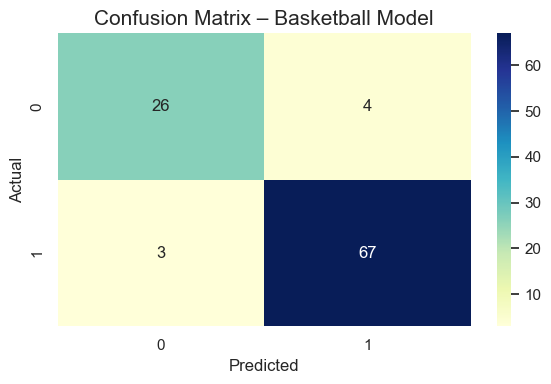

<Figure size 1000x600 with 0 Axes>

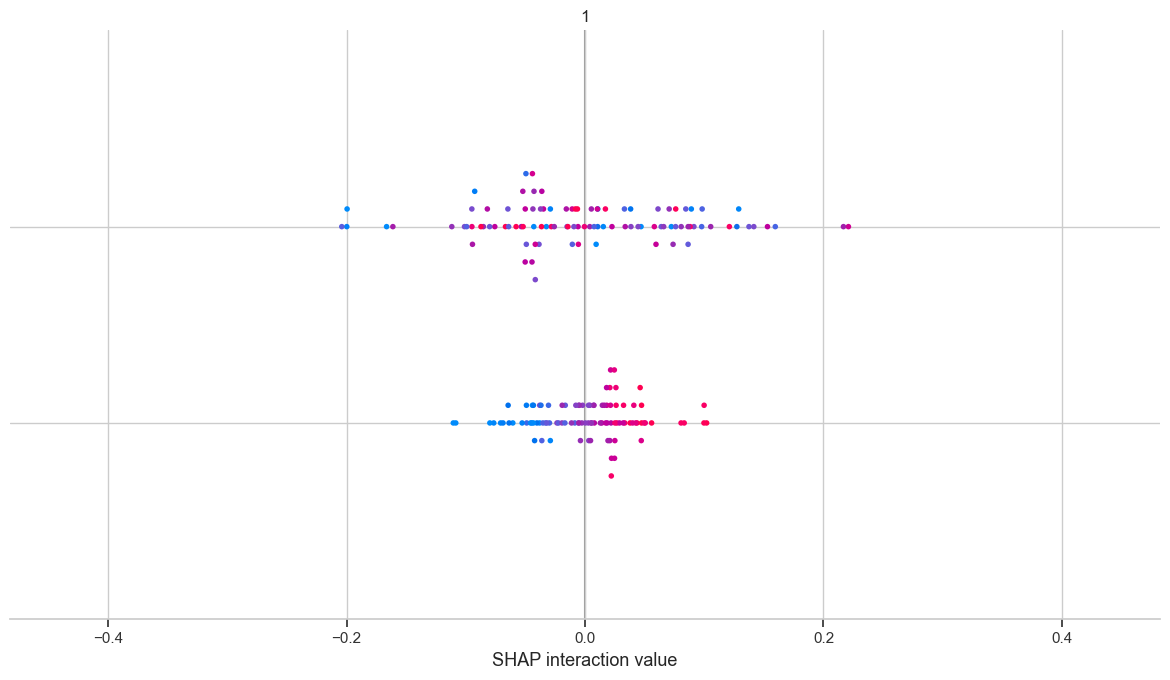

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix

# Load correct test data (must match new model)
X_test_pca = pd.read_csv(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data\X_basketball_pca.csv")
y_test = pd.read_csv(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\data\y_test.csv").squeeze()

# Load retrained PCA-compatible model
model = joblib.load(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\models_crosssport\rf_model_basketball_pca.joblib")


# Evaluate
y_pred = model.predict(X_test_pca.values)
y_prob = model.predict_proba(X_test_pca.values)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix – Basketball Model", fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Optional: Save image for report
plt.savefig(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\analysis\basketball_confusion_matrix_roc9719.png")

plt.show()

# Create SHAP explainer and compute values
explainer = shap.Explainer(model, X_test_pca)
shap_values = explainer(X_test_pca)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_pca, show=True)



# Testing Trained Model on a New Sports Dataset - Cross-Sport Athlete Performance Dataset

In [132]:
# Step 14: Testing Trained Model on a New Sport Datset - Basketball

# Importing libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

test_file = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\cross_sport_selection_dataset.csv"

df = pd.read_csv(test_file)
df.head()

,athlete_id,sport,age,gender,training_years,vo2_max,hrv,lactate_threshold,stride_length,cadence,force_application,performance_score,adaptability_score,skiing_potential
0,A0001,running,24,M,6,56.9,86.6,78.2,1.26,178,243.5,9.12,7.96,77.9
1,A0002,cycling,22,F,14,73.3,84.7,74.7,1.36,165,345.2,8.56,7.36,85.5
2,A0003,running,25,M,1,59.1,85.0,86.7,1.10,195,216.2,8.86,6.48,80.4
3,A0004,running,31,F,9,71.4,71.9,82.4,1.19,189,290.2,9.85,9.31,67.0
4,A0005,cycling,30,F,3,56.7,76.6,70.7,1.44,157,335.2,9.78,7.03,67.1


In [133]:
df.shape

(3474, 14)

In [134]:
# Understanding the data's structure

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   athlete_id          3474 non-null   object 
 1   sport               3474 non-null   object 
 2   age                 3474 non-null   int64  
 3   gender              3474 non-null   object 
 4   training_years      3474 non-null   int64  
 5   vo2_max             3474 non-null   float64
 6   hrv                 3474 non-null   float64
 7   lactate_threshold   3474 non-null   float64
 8   stride_length       3474 non-null   float64
 9   cadence             3474 non-null   int64  
 10  force_application   3474 non-null   float64
 11  performance_score   3474 non-null   float64
 12  adaptability_score  3474 non-null   float64
 13  skiing_potential    3474 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 380.1+ KB


athlete_id            0
sport                 0
age                   0
gender                0
training_years        0
vo2_max               0
hrv                   0
lactate_threshold     0
stride_length         0
cadence               0
force_application     0
performance_score     0
adaptability_score    0
skiing_potential      0
dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.23      0.26       226
           1       0.67      0.77      0.72       469

    accuracy                           0.59       695
   macro avg       0.50      0.50      0.49       695
weighted avg       0.56      0.59      0.57       695

Confusion Matrix:
 [[ 51 175]
 [108 361]]
ROC AUC Score: 0.5007217389663566


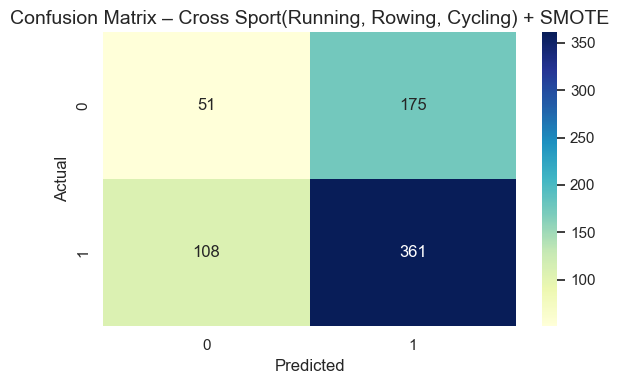

SHAP values shape: (695, 10)
X_test shape: (695, 10)


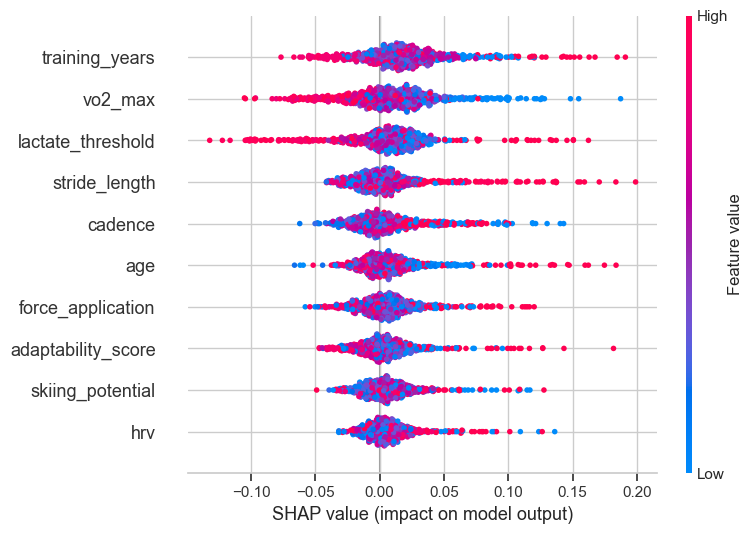

Final Cross-Sport model, SHAP values, and evaluation report saved.


In [135]:
import pandas as pd
import numpy as np
import os
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv(r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\cross_sport_selection_dataset.csv")

# Preprocess
df = df.drop(columns=['athlete_id', 'gender', 'sport'])  # Drop metadata
df = df.dropna(subset=['performance_score'])              # Drop missing labels

# Create binary target
df['high_performer'] = (df['performance_score'] >= 8.0).astype(int)
X = df.drop(columns=['performance_score', 'high_performer'])
y = df['high_performer']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Recreate DataFrames with feature names
X_train_bal_df = pd.DataFrame(X_train_bal, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal_df, y_train_bal)

# Predict
y_pred = rf.predict(X_test_scaled_df)
y_prob = rf.predict_proba(X_test_scaled_df)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix – Cross Sport(Running, Rowing, Cycling) + SMOTE", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# SHAP Explainability
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled_df)

# Fix for binary classification if 3D output is returned
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_vals_to_plot = shap_values[1]  # Class 1
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    shap_vals_to_plot = shap_values[:, :, 1]  # 3D: (samples, features, classes)
else:
    shap_vals_to_plot = shap_values  # Already correct

# Validate shape
print("SHAP values shape:", shap_vals_to_plot.shape)
print("X_test shape:", X_test_scaled_df.shape)
assert shap_vals_to_plot.shape == X_test_scaled_df.shape, "Shape mismatch!"

# SHAP summary plot
shap.summary_plot(shap_vals_to_plot, X_test_scaled_df, show=True)

# Save artifacts
model_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\models_crosssport"
shap_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\shap_objects"
report_dir = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\analysis"

os.makedirs(model_dir, exist_ok=True)
os.makedirs(shap_dir, exist_ok=True)
os.makedirs(report_dir, exist_ok=True)

joblib.dump(rf, os.path.join(model_dir, "rf_crosssport_model.joblib"))
joblib.dump(scaler, os.path.join(model_dir, "scaler_crosssport.joblib"))
joblib.dump(shap_vals_to_plot, os.path.join(shap_dir, "shap_crosssport_values.joblib"))

# Save evaluation report
with open(os.path.join(report_dir, "crosssport_model_evaluation.txt"), "w") as f:
    f.write("Cross-Sport RF Model Evaluation Report\n")
    f.write("=" * 40 + "\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_pred)))
    f.write("\n\nROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_prob)))

print("Final Cross-Sport model, SHAP values, and evaluation report saved.")


# MASTER PYTHON SCRIPT: samuel_agyekum_msc_project_player_performance_analysis.py

In [136]:
# Step 7: MASTER PYTHON SCRIPT

# samuel_agyekum_msc_project_player_performance_analysis.py
# Saving & Loading Script for Msc Data Analytics & IT Security Management - Research Project
# Author Samuel Boadi Agyekum
# Project Title: Player Performance Analysis in Sports Using Data Analytics
# Updated: 3rd May 2025

import os
import pandas as pd
import joblib
import pickle


# ============================================================================================================================================
#                                           Defining base and subfolder paths
# ============================================================================================================================================

base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")
model_path = os.path.join(base_path, "models")
plots_path = os.path.join(base_path, "plots")
shap_path = os.path.join(base_path, "shap_plots")


# ============================================================================================================================================
#                                           Step 5's: Saving Cleaned & Trained Assets
# ============================================================================================================================================

def save_all(club_teams_final, X_train, X_test, y_train, y_test, rf_model, explainer, shap_values):
    
    # saving Cleaned and Split Data
    club_teams_final.to_csv(os.path.join(data_path, "club_teams_final.csv"), index=False)
    X_train.to_csv(os.path.join(data_path, "X_train.csv"), index=False)
    X_test.to_csv(os.path.join(data_path, "X_test.csv"), index=False)
    y_train.to_csv(os.path.join(data_path, "y_train.csv"), index=False)
    y_test.to_csv(os.path.join(data_path, "y_test.csv"), index=False)

    # Saving trained model
    joblib.dump(rf_model, os.path.join(model_path, "rf_model.joblib"))
    
    # Saving SHAP explainer and values
    with open (os.path.join(shap_path, "explainer.pkl"), "wb") as f:
        pickle.dump(explainer, f)
        
    with open(os.path.join(shap_path, "shap_values.pkl"), "wb") as f:
         pickle.dump(shap_values, f)
    
    print(f"Step 5: All files saved successfully at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    

# ============================================================================================================================================
#                                           Step 6's: Loading All Saved Assets
# ============================================================================================================================================

def load_all():
  
    # Loading cleaned data 
    club_teams_final = pd.read_csv(os.path.join(data_path, "club_teams_final.csv"))
    X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
    X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
    y_train = pd.read_csv(os.path.join(data_path, "y_train.csv")).squeeze()
    y_test = pd.read_csv(os.path.join(data_path, "y_test.csv")).squeeze()


    # Loading trained model
    rf_model = joblib.load(os.path.join(model_path, "rf_model.joblib"))
    
    # Load SHAP explainer and values
    with open (os.path.join(shap_path, "explainer.pkl"), "rb") as f:
        explainer = pickle.load(f)
    
    with open(os.path.join(shap_path, "shap_values.pkl"), "rb") as f:
        shap_values = pickle.load(f)
    
    print(f"Step 6: All files loaded successfully at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")  
    return club_teams_final, X_train, X_test, y_train, y_test, rf_model, explainer, shap_values

In [147]:
# # Exporting samuel_agyekum_msc_project_player_performance_analysis.py file
# script_code = r'''
# # samuel_agyekum_msc_project_player_performance_analysis.py
# # Saving & Loading Script for Msc Data Analytics & IT Security Management - Research Project
# # Author Samuel Boadi Agyekum
# # Project Title: Player Performance Analysis in Sports Using Data Analytics
# # Updated: 3rd May 2025

# import os
# import pandas as pd
# import joblib
# import pickle


# # ============================================================================================================================================
# #                                           Defining base and subfolder paths
# # ============================================================================================================================================

# base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
# data_path = os.path.join(base_path, "data")
# model_path = os.path.join(base_path, "models")
# plots_path = os.path.join(base_path, "plots")
# shap_path = os.path.join(base_path, "shap_plots")


# # ============================================================================================================================================
# #                                           Step 5's: Saving Cleaned & Trained Assets
# # ============================================================================================================================================

# def save_all(club_teams_final, X_train, X_test, y_train, y_test, rf_model, explainer, shap_values):
    
#     # saving Cleaned and Split Data
#     club_teams_final.to_csv(os.path.join(data_path, "club_teams_final.csv"), index=False)
#     X_train.to_csv(os.path.join(data_path, "X_train.csv"), index=False)
#     X_test.to_csv(os.path.join(data_path, "X_test.csv"), index=False)
#     y_train.to_csv(os.path.join(data_path, "y_train.csv"), index=False)
#     y_test.to_csv(os.path.join(data_path, "y_test.csv"), index=False)

#     # Saving trained model
#     joblib.dump(rf_model, os.path.join(model_path, "rf_model.joblib"))
    
#     # Saving SHAP explainer and values
#     with open (os.path.join(shap_path, "explainer.pkl"), "wb") as f:
#         pickle.dump(explainer, f)
        
#     with open(os.path.join(shap_path, "shap_values.pkl"), "wb") as f:
#          pickle.dump(shap_values, f)
    
#     print(f"Step 5: All files saved successfully at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")   

# # ============================================================================================================================================
# #                                           Step 6's: Loading All Saved Assets
# # ============================================================================================================================================

# def load_all():
  
#     # Loading cleaned data 
#     club_teams_final = pd.read_csv(os.path.join(data_path, "club_teams_final.csv"))
#     X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
#     X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
#     y_train = pd.read_csv(os.path.join(data_path, "y_train.csv")).squeeze()
#     y_test = pd.read_csv(os.path.join(data_path, "y_test.csv")).squeeze()


#     # Loading trained model
#     rf_model = joblib.load(os.path.join(model_path, "rf_model.joblib"))
    
#     # Load SHAP explainer and values
#     with open (os.path.join(shap_path, "explainer.pkl"), "rb") as f:
#         explainer = pickle.load(f)
    
#     with open(os.path.join(shap_path, "shap_values.pkl"), "rb") as f:
#         shap_values = pickle.load(f)
    
#     print(f"Step 6: All files loaded successfully at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")   
#     return club_teams_final, X_train, X_test, y_train, y_test, rf_model, explainer, shap_values
#     '''


# # File path to save .py

# file_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs\samuel_agyekum_msc_project_player_performance_analysis.py"

# # Writing the file
# with open(file_path, "w", encoding="utf-8") as f:
#     f.write(script_code)

# from datetime import datetime

# print(f"Python script exported successfully to:\n{file_path}")

# samuel_agyekum_msc_project_player_performance_analysis.py
# Saving & Loading Script for MSc Data Analytics & IT Security Management - Research Project
# Author: Samuel Boadi Agyekum
# Project Title: Player Performance Analysis in Sports Using Data Analytics
# Updated: 10th July 2025

import os
import pandas as pd
import joblib
import pickle
from datetime import datetime

# ============================================================================================================================================
#                                           Define base and subfolder paths
# ============================================================================================================================================

base_path = r"C:\Users\agyek\OneDrive\Data_Analytics_and_IT_Security_Management\Data Analytics\Research Project\Datasets\msc_outputs"
data_path = os.path.join(base_path, "data")
model_path = os.path.join(base_path, "models")
plots_path = os.path.join(base_path, "plots")
shap_path = os.path.join(base_path, "shap_plots")

# ============================================================================================================================================
#                                           Ensure directories exist
# ============================================================================================================================================

for path in [data_path, model_path, plots_path, shap_path]:
    os.makedirs(path, exist_ok=True)

# ============================================================================================================================================
#                                           Function to save all key project assets
# ============================================================================================================================================

def save_all(club_teams_final, X_train, X_test, y_train, y_test, rf_model, explainer, shap_values):
    # Save cleaned and split data
    club_teams_final.to_csv(os.path.join(data_path, "club_teams_final.csv"), index=False)
    X_train.to_csv(os.path.join(data_path, "X_train.csv"), index=False)
    X_test.to_csv(os.path.join(data_path, "X_test.csv"), index=False)
    y_train.to_csv(os.path.join(data_path, "y_train.csv"), index=False)
    y_test.to_csv(os.path.join(data_path, "y_test.csv"), index=False)

    # Save trained Random Forest model
    joblib.dump(rf_model, os.path.join(model_path, "rf_model.joblib"))

    # Save SHAP explainer and values
    with open(os.path.join(shap_path, "explainer.pkl"), "wb") as f:
        pickle.dump(explainer, f)

    with open(os.path.join(shap_path, "shap_values.pkl"), "wb") as f:
        pickle.dump(shap_values, f)

    print(f"Step 5: All project files saved successfully at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# ============================================================================================================================================
#                                           Function to load all saved assets for reuse or testing
# ============================================================================================================================================

def load_all():
    # Load cleaned and split data
    club_teams_final = pd.read_csv(os.path.join(data_path, "club_teams_final.csv"))
    X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
    X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
    y_train = pd.read_csv(os.path.join(data_path, "y_train.csv")).squeeze()
    y_test = pd.read_csv(os.path.join(data_path, "y_test.csv")).squeeze()

    # Load trained model
    rf_model = joblib.load(os.path.join(model_path, "rf_model.joblib"))

    # Load SHAP explainer and values
    with open(os.path.join(shap_path, "explainer.pkl"), "rb") as f:
        explainer = pickle.load(f)

    with open(os.path.join(shap_path, "shap_values.pkl"), "rb") as f:
        shap_values = pickle.load(f)

    print(f"Step 6: All project files loaded successfully at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    return club_teams_final, X_train, X_test, y_train, y_test, rf_model, explainer, shap_values


In [148]:
# =============================
# Step 15: Saving All Final Assets
# =============================
save_all(
    club_teams_final,
    X_train,
    X_test,
    y_train,
    y_test,
    rf_model,
    explainer,
    shap_values
)

Step 5: All project files saved successfully at 2025-07-10 22:16:17
